# # HW1 - Electricity Demand Prediction

# # Importing libraries to be used in the project

In [1]:
import pandas as pd
import numpy as np
import datetime 
from datetime import timedelta  
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima_model import ARIMA

In [2]:
models=[]
hbhourlymae=[]
hbdailymae=[]
hchourlymae=[]
hcdailymae=[]
hfhourlymae=[]
hfdailymae=[]

# # Reading data

In [3]:
homeb_power_df = pd.read_csv("../data/HomeB-meter1_2014.csv")
homeb_weather_df = pd.read_csv("../data/homeB2014.csv")
homec_power_df = pd.read_csv("../data/HomeC-meter1_2016.csv")
homec_weather_df = pd.read_csv("../data/homeC2016.csv")
homef_power_df = pd.read_csv("../data/HomeF-meter3_2016.csv")
homef_weather_df = pd.read_csv("../data/homeF2016.csv")

# # Visualising Raw data

HOME B

In [4]:
homeb_power_df.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [5]:
homeb_weather_df.head()

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,28.62,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,16.49,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,6.87,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,6.49,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,7.29,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


HOME C

In [6]:
homec_power_df.head()

,Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
0,2016-01-01 00:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483
1,2016-01-01 00:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467
2,2016-01-01 00:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467
3,2016-01-01 00:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483
4,2016-01-01 00:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467


In [7]:
homec_weather_df.head()

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,36.04,cloudy,0.69,10.0,Overcast,29.75,1017.50,8.03,1.00,1451606400,282.0,0.0,26.88,0.0
1,37.09,partly-cloudy-night,0.66,10.0,Partly Cloudy,31.25,1017.57,7.64,0.31,1451610000,293.0,0.0,26.63,0.0
2,36.78,clear-night,0.64,10.0,Clear,29.43,1017.50,10.47,NaN,1451613600,284.0,0.0,25.68,0.0
3,36.84,partly-cloudy-night,0.63,10.0,Partly Cloudy,31.18,1017.51,7.24,0.31,1451617200,288.0,0.0,25.30,0.0
4,36.41,clear-night,0.62,10.0,Clear,29.75,1017.30,8.87,NaN,1451620800,287.0,0.0,24.51,0.0


HOME F

In [8]:
homef_power_df.head()

,Date & Time,Usage [kW],Generation [kW],Net_Meter [kW],Volt [kW],Garage_E [kW],Garage_W [kW],Phase_A [kW],Phase_B [kW],Solar [kW]
0,2016-01-01 00:00:00,0.404217,0.009483,0.413700,0.002167,0.000000,0.000350,0.168167,0.236050,0.009483
1,2016-01-01 00:01:00,0.338933,0.009200,0.348133,0.002133,0.000017,0.000350,0.169383,0.169550,0.009200
2,2016-01-01 00:02:00,0.402850,0.009133,0.411983,0.002167,0.000000,0.000350,0.164583,0.238267,0.009133
3,2016-01-01 00:03:00,0.530683,0.009883,0.540567,0.002133,0.000000,0.000367,0.170683,0.360000,0.009883
4,2016-01-01 00:04:00,1.654650,0.010483,1.665133,0.002133,0.000017,0.000350,0.170400,1.484250,0.010483


In [9]:
homef_weather_df.head()

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,37.57,partly-cloudy-night,0.73,9.65,Mostly Cloudy,30.19,1013.10,11.03,0.82,1451606400,186,0.0000,29.89,0.00
1,38.28,partly-cloudy-night,0.71,9.02,Partly Cloudy,30.54,1013.02,12.35,0.31,1451610000,197,0.0011,29.73,0.02
2,36.74,rain,0.81,8.98,Light Rain,28.54,1012.47,12.53,0.31,1451613600,199,0.0124,31.40,0.53
3,35.94,rain,0.84,8.39,Light Rain,29.62,1012.09,8.06,0.31,1451617200,198,0.0161,31.52,0.57
4,34.99,rain,0.88,8.73,Light Rain,29.47,1011.65,6.45,0.31,1451620800,186,0.0153,31.84,0.56


# # Understanding data

Home B - Power Data

In [10]:
homeb_power_df.describe()

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
count,17520.000000,17520.0,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,0.662905,0.0,0.662905,0.088999,0.085888,0.011036,0.003067,0.015852,0.005105,0.005949,4.602680e-02,0.069099,0.005005,0.053700,0.004186,0.015237,0.073561
std,0.678399,0.0,0.678399,0.438887,0.129054,0.013123,0.020444,0.030792,0.020500,0.003621,7.525857e-02,0.430429,0.007543,0.037668,0.005455,0.066807,0.062182
min,0.011083,0.0,0.011083,0.000000,0.000117,0.000083,0.000000,0.000350,0.000017,0.000050,5.560000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.314125,0.0,0.314125,0.000030,0.009340,0.005414,0.000099,0.003630,0.002388,0.004841,2.116667e-03,0.000030,0.000298,0.003468,0.001346,0.004153,0.006558
50%,0.468725,0.0,0.468725,0.000069,0.009704,0.005881,0.000219,0.003718,0.003737,0.004928,3.109528e-02,0.000058,0.006979,0.072627,0.003882,0.004624,0.070129
75%,0.700617,0.0,0.700617,0.000707,0.143531,0.007042,0.000333,0.015980,0.003876,0.005001,6.671972e-02,0.000096,0.007175,0.077099,0.004446,0.004877,0.129642
max,6.833205,0.0,6.833205,3.687768,0.437212,0.146692,0.819167,0.423816,0.476571,0.047370,1.514727e+00,4.287879,0.366653,0.211308,0.074872,1.701807,0.410929


Home B - Power Data has 17520 rows from the command above, i.e. interval of half an hour for each day of the year as we can see in the homeb_power_df.head(). (365 times 24 times 2 = 17520)

Home B - Weather Data

In [11]:
homeb_weather_df.describe()

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,7290.000000,8.760000e+03,8760.00000,8760.000000,8760.000000,8760.000000
mean,48.062076,0.682888,9.025791,45.289160,1016.450749,6.534568,0.137971,1.404301e+09,204.46347,0.003761,37.072056,0.066771
std,19.694743,0.188763,1.859263,22.860668,7.903670,3.884500,0.212384,9.104179e+06,106.57823,0.015565,20.257221,0.183459
min,-10.070000,0.140000,0.320000,-18.280000,979.980000,0.030000,0.000000,1.388534e+09,0.00000,0.000000,-15.870000,0.000000
25%,33.165000,0.530000,9.040000,27.967500,1011.530000,3.630000,0.000000,1.396418e+09,150.00000,0.000000,23.425000,0.000000
50%,49.220000,0.710000,9.970000,47.360000,1016.430000,5.850000,0.060000,1.404301e+09,210.00000,0.000000,38.510000,0.000000
75%,63.832500,0.860000,10.000000,63.832500,1021.310000,8.692500,0.200000,1.412184e+09,297.00000,0.000000,54.302500,0.000000
max,89.460000,0.960000,10.000000,97.520000,1042.400000,24.750000,1.000000,1.420067e+09,359.00000,0.355700,72.880000,0.870000


Home B - Weather Data has 8760 rows from the command above, i.e. every hour has 1 row as we can see in the homeb_weather_df.head(). (365 times 24 = 8760)

Home C

In [12]:
homec_power_df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,0.002755,0.007023,0.000009,0.058530,0.015642,0.010983,0.035313,0.076229
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,0.021860,0.076740,0.000010,0.202706,0.137841,0.098859,0.096056,0.128428
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,0.000500,0.000017,0.000000,0.029833,0.000983,0.003617,0.001483,0.003367
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,0.000667,0.000050,0.000017,0.031317,0.001000,0.004000,0.001617,0.004283
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,0.000750,0.000167,0.000017,0.032883,0.001017,0.004067,0.001750,0.083917
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,1.166583,2.262583,0.000183,7.027900,1.633017,1.929800,0.465217,0.613883


Home C - Power Data has 503910 rows from the command above, i.e. interval of every minute for each day till 15th December, 2016. (350 times 24 times 60 = 504000 ~ 503910)

In [13]:
homec_weather_df.describe()

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
count,8760.000000,8759.000000,8759.000000,8760.000000,8759.000000,8759.000000,7646.000000,8.760000e+03,8755.000000,8760.000000,8759.000000,8760.000000
mean,50.778863,0.664475,9.253204,48.307248,1016.318222,6.644007,0.151640,1.467373e+09,202.451285,0.002596,38.748637,0.056281
std,19.115781,0.194323,1.612105,22.027423,7.891397,3.979703,0.187327,9.104179e+06,106.555006,0.011263,19.088650,0.165662
min,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,1.451606e+09,0.000000,0.000000,-27.240000,0.000000
25%,35.800000,0.510000,9.420000,31.127500,1011.305000,3.660000,0.030000,1.459490e+09,148.000000,0.000000,24.640000,0.000000
50%,50.380000,0.680000,10.000000,50.380000,1016.550000,5.920000,0.090000,1.467373e+09,209.000000,0.000000,39.160000,0.000000
75%,66.340000,0.840000,10.000000,66.340000,1021.485000,8.930000,0.210000,1.475256e+09,295.000000,0.000000,54.820000,0.000000
max,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,1.000000,1.483139e+09,359.000000,0.191000,75.490000,0.840000


Home C - Weather Data has 8760 rows from the command above, i.e. every hour has 1 row as we can see in the homec_weather_df.head(). (365 times 24 = 8760)

Home F

In [14]:
homef_power_df.describe()

,Usage [kW],Generation [kW],Net_Meter [kW],Volt [kW],Garage_E [kW],Garage_W [kW],Phase_A [kW],Phase_B [kW],Solar [kW]
count,503925.000000,503925.000000,503925.000000,503925.000000,503925.000000,503925.000000,503925.000000,503925.000000,503925.000000
mean,1.606166,1.477778,2.129764,0.446904,0.000460,0.000705,0.887056,0.719110,1.477778
std,2.014176,2.491460,2.333939,1.195090,0.001225,0.000974,1.059945,1.005056,2.491460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.462350,0.008700,0.444883,0.002067,0.000000,0.000350,0.205250,0.176900,0.008700
50%,0.919583,0.010950,1.046717,0.002100,0.000000,0.000367,0.659117,0.270100,0.010950
75%,1.590633,1.886333,3.582300,0.002167,0.000017,0.000383,0.994883,0.836367,1.886333
max,331.665883,351.232883,64.182217,4.144700,0.004267,0.039667,211.967000,119.698883,351.232883


Home F - Power Data has 503925 rows from the command above, i.e. interval of every minute for each day till 15th December, 2016. (350 times 24 times 60 = 504000 ~ 503925)

In [15]:
homef_weather_df.describe()

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,7800.000000,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.000000
mean,50.950938,0.662142,9.259466,48.508163,1016.370790,6.694949,0.149892,1.467373e+09,199.924543,0.002525,38.740684,0.052318
std,19.207176,0.198988,1.646559,22.085334,7.909168,4.127926,0.182667,9.104179e+06,109.278412,0.011867,19.133319,0.161126
min,-12.380000,0.130000,0.280000,-31.700000,986.340000,0.130000,0.000000,1.451606e+09,0.000000,0.000000,-27.590000,0.000000
25%,35.960000,0.510000,9.510000,31.240000,1011.357500,3.570000,0.030000,1.459490e+09,137.750000,0.000000,24.610000,0.000000
50%,50.520000,0.680000,10.000000,50.520000,1016.590000,5.930000,0.100000,1.467373e+09,205.000000,0.000000,39.095000,0.000000
75%,66.550000,0.840000,10.000000,66.550000,1021.540000,9.090000,0.220000,1.475256e+09,296.000000,0.000000,54.840000,0.000000
max,94.170000,0.980000,10.000000,100.850000,1042.710000,24.140000,1.000000,1.483139e+09,359.000000,0.236400,75.500000,0.850000


Home F - Weather Data has 8760 rows from the command above, i.e. every hour has 1 row as we can see in the homef_weather_df.head(). (365 times 24 = 8760)

# # Preprocessing

Before proceeding forward with the machine learning models, we need to pre process the data in order to make it suitable for applying in the machine learning models. We need to combine the two data sets upon a same column. Therefore, we need to normalize the power data set to hour basis and combine with the weather data set.

1. Converting to Date Time field for Power Data - This is required to leverage the pandas date time properties to get hourly, daily, weekly, monthly data sets.
2. Adding Date Time column to Weather Data - This is required to have a column which will be same as the energy data set and merge can be possible of the power and energy data sets is possible.

In [16]:

homeb_power_df['Date & Time']= pd.to_datetime(homeb_power_df['Date & Time'])
homec_power_df['Date & Time']= pd.to_datetime(homec_power_df['Date & Time'])
homef_power_df['Date & Time']= pd.to_datetime(homef_power_df['Date & Time'])

def GetCurrentDate(currentyear):
    currenttime = datetime.datetime(currentyear,1,1,0,0,0) 
    datearr = []
    for index, row in homeb_weather_df.iterrows():
        datearr.append(currenttime)
        #add delta of one hour to each iteration
        currenttime = currenttime + timedelta(hours=1)

    return datearr

homeb_weather_df['Date & Time'] = GetCurrentDate(2014)
homec_weather_df['Date & Time'] = GetCurrentDate(2016)
homef_weather_df['Date & Time'] = GetCurrentDate(2016)

3. Rounding off every half an hour to the below hour - Required to normalise the data set which can be merged
4. Group by hour to calculate the sum of power used every hour - Grouping by the normalised time, adding energy used for the whole hour
5. Merge the power and weather data frames by date & time column since both of them has same rows after the grouping

In [17]:
homeb_power_df['Date & Time']= homeb_power_df["Date & Time"].dt.floor(freq = 'H')
homec_power_df['Date & Time']= homec_power_df["Date & Time"].dt.floor(freq = 'H')
homef_power_df['Date & Time']= homef_power_df["Date & Time"].dt.floor(freq = 'H')

homeb_hourly_power_df = homeb_power_df.groupby('Date & Time').sum().reset_index()
homec_hourly_power_df = homec_power_df.groupby('Date & Time').sum().reset_index()
homef_hourly_power_df = homef_power_df.groupby('Date & Time').sum().reset_index()

In [18]:
def datasetComparison(homeb_df, homec_df, homef_df):
    homes=[]
    emaxs=[]
    emins=[]
    emeans=[]
    emedians=[]
    tmaxs=[]
    tmins=[]
    tmeans=[]
    tmedians=[]

    homes.append("B")
    emaxs.append(homeb_df['use [kW]'].max())
    emins.append(homeb_df['use [kW]'].min())
    emeans.append(homeb_df['use [kW]'].mean())
    emedians.append(homeb_df['use [kW]'].median())
    tmaxs.append(homeb_df['temperature'].max())
    tmins.append(homeb_df['temperature'].min())
    tmeans.append(homeb_df['temperature'].mean())
    tmedians.append(homeb_df['temperature'].median())

    homes.append("C")
    emaxs.append(homec_df['use [kW]'].max())
    emins.append(homec_df['use [kW]'].min())
    emeans.append(homec_df['use [kW]'].mean())
    emedians.append(homec_df['use [kW]'].median())
    tmaxs.append(homec_df['temperature'].max())
    tmins.append(homec_df['temperature'].min())
    tmeans.append(homec_df['temperature'].mean())
    tmedians.append(homec_df['temperature'].median())

    homes.append("F")
    emaxs.append(homef_df['Usage [kW]'].max())
    emins.append(homef_df['Usage [kW]'].min())
    emeans.append(homef_df['Usage [kW]'].mean())
    emedians.append(homef_df['Usage [kW]'].median())
    tmaxs.append(homef_df['temperature'].max())
    tmins.append(homef_df['temperature'].min())
    tmeans.append(homef_df['temperature'].mean())
    tmedians.append(homef_df['temperature'].median())

    comparison = pd.DataFrame({
        'Home': homes,
        'Energy Maximum': emaxs,
        'Energy Minimum': emins,
        'Energy Mean': emeans,
        'Energy Median': emedians,
        'Temperature Maximum': tmaxs,
        'Temperature Minimum': tmins,
        'Temperature Mean': tmeans,
        'Temperature Median': tmedians,
    })
    
    return comparison

# Hourly - Energy : Weather Merged Data Frames

In [19]:
homeb_hourly_df = homeb_hourly_power_df.merge(homeb_weather_df, on="Date & Time", how = 'left')
homec_hourly_df = homec_hourly_power_df.merge(homec_weather_df, on="Date & Time", how = 'left')
homef_hourly_df = homef_hourly_power_df.merge(homef_weather_df, on="Date & Time", how = 'left')

Visualising the merged data frame

In [20]:
homeb_hourly_df.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],...,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01 00:00:00,0.961211,0.0,0.961211,0.001592,0.373869,0.010858,0.000169,0.014689,0.007348,...,Partly Cloudy,28.62,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,2014-01-01 01:00:00,1.296874,0.0,1.296874,0.003591,0.828642,0.011060,0.000104,0.007027,0.006960,...,Clear,16.49,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,2014-01-01 02:00:00,0.594908,0.0,0.594908,0.000472,0.144112,0.010717,0.000173,0.007321,0.007614,...,Clear,6.87,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,2014-01-01 03:00:00,1.128584,0.0,1.128584,0.002928,0.678013,0.011016,0.000063,0.007144,0.007091,...,Clear,6.49,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,2014-01-01 04:00:00,0.842418,0.0,0.842418,0.001718,0.397099,0.010854,0.000174,0.007240,0.007300,...,Clear,7.29,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


In [21]:
homec_hourly_df.head()

,Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 00:00:00,62.647783,0.198417,62.647783,0.003817,8.077850,15.513433,14.508850,2.271667,3.801033,...,Overcast,29.75,1017.50,8.03,1.00,1451606400,282.0,0.0,26.88,0.0
1,2016-01-01 01:00:00,55.090017,0.205300,55.090017,0.005950,14.194200,13.208250,2.597617,4.531317,6.776500,...,Partly Cloudy,31.25,1017.57,7.64,0.31,1451610000,293.0,0.0,26.63,0.0
2,2016-01-01 02:00:00,42.884167,0.206900,42.884167,0.002550,5.965467,16.364733,2.604967,3.569133,0.431050,...,Clear,29.43,1017.50,10.47,NaN,1451613600,284.0,0.0,25.68,0.0
3,2016-01-01 03:00:00,57.600767,0.206850,57.600767,0.008300,22.509200,14.473017,3.900833,3.624717,0.422683,...,Partly Cloudy,31.18,1017.51,7.24,0.31,1451617200,288.0,0.0,25.30,0.0
4,2016-01-01 04:00:00,38.390183,0.206350,38.390183,0.003617,9.180000,11.450550,2.603500,2.106350,0.428567,...,Clear,29.75,1017.30,8.87,NaN,1451620800,287.0,0.0,24.51,0.0


In [22]:
homef_hourly_df.head()

,Date & Time,Usage [kW],Generation [kW],Net_Meter [kW],Volt [kW],Garage_E [kW],Garage_W [kW],Phase_A [kW],Phase_B [kW],Solar [kW],...,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 00:00:00,46.765833,0.585750,47.351583,0.128733,0.000233,0.021133,9.948817,36.817017,0.585750,...,Mostly Cloudy,30.19,1013.10,11.03,0.82,1451606400,186,0.0000,29.89,0.00
1,2016-01-01 01:00:00,45.321500,0.588167,45.909667,0.128700,0.000233,0.021283,9.837400,35.484100,0.588167,...,Partly Cloudy,30.54,1013.02,12.35,0.31,1451610000,197,0.0011,29.73,0.02
2,2016-01-01 02:00:00,43.066550,0.587600,43.654150,0.128533,0.000217,0.021183,9.821067,33.245483,0.587600,...,Light Rain,28.54,1012.47,12.53,0.31,1451613600,199,0.0124,31.40,0.53
3,2016-01-01 03:00:00,45.190517,0.589967,45.780483,0.129267,0.000200,0.020833,9.788833,35.401683,0.589967,...,Light Rain,29.62,1012.09,8.06,0.31,1451617200,198,0.0161,31.52,0.57
4,2016-01-01 04:00:00,44.654733,0.573967,45.228700,0.129133,0.000267,0.020867,9.756333,34.898400,0.573967,...,Light Rain,29.47,1011.65,6.45,0.31,1451620800,186,0.0153,31.84,0.56


# # # Comparing Data Set

In [23]:
comparison = datasetComparison(homeb_hourly_df,homec_hourly_df,homef_hourly_df)
display(comparison)

,Home,Energy Maximum,Energy Minimum,Energy Mean,Energy Median,Temperature Maximum,Temperature Minimum,Temperature Mean,Temperature Median
0,B,11.599703,0.022167,1.325961,0.943233,89.46,-10.07,48.063286,49.22
1,C,574.811067,0.048000,51.540812,40.567117,93.72,-12.64,51.719827,51.83
2,F,581.152450,0.000000,96.378541,60.103283,94.17,-12.38,51.889837,51.99


On comparing the the raw merged data sets of the three homes, it is seen than Home B has a relative less power usage in the Home C and F. Also, we can see that Mean and Median Energy is maximum in Home F. Temperatures are relatively same for all the three houses, hence we can say that all the homes are almost in the same temperature region. Precisely Home B is in the coldest region with respect to the other 2 homes.

# Daily - Energy : Weather Merged Data Frames

1. Taking sum of all the rows for particular days in Power Data Set
2. Taking median of rows for particular days in Weather Data Set. (We cannot simply do a sum like the power data set as adding temperatures is not a practical solution. We are taking median and not mean of the temperatures data set to handle outliers)
3. Merging the power and weather daily data frames on Date & Time column

Home B

In [24]:
homeb_hourly_power_df['Date & Time']= homeb_hourly_power_df["Date & Time"].dt.floor(freq = 'D')
homeb_daily_power_df = homeb_hourly_power_df.groupby('Date & Time').sum().reset_index()
homeb_weather_df['Date & Time']= homeb_weather_df["Date & Time"].dt.floor(freq = 'D')
homeb_daily_weather_df = homeb_weather_df.groupby('Date & Time').median().reset_index()
homeb_daily_df = homeb_daily_power_df.merge(homeb_daily_weather_df, on="Date & Time", how = 'left')
homeb_daily_df.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],...,visibility,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,65.013592,0.0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,...,10.000,9.210,1026.500,6.260,0.0,1.388576e+09,250.0,0.00000,5.745,0.00
1,2014-01-02,32.305336,0.0,32.305336,0.047452,10.830045,0.600321,0.323182,0.506440,0.178024,...,2.460,5.725,1024.790,8.305,0.0,1.388662e+09,29.0,0.00145,10.585,0.03
2,2014-01-03,31.164468,0.0,31.164468,0.055865,12.417151,0.442453,0.004276,0.507426,0.176649,...,2.030,-9.710,1013.220,13.210,0.0,1.388749e+09,327.5,0.00135,-1.270,0.04
3,2014-01-04,45.287782,0.0,45.287782,0.048827,11.147332,0.674477,1.046294,0.515988,0.180056,...,9.945,-7.110,1030.675,3.585,0.0,1.388835e+09,241.0,0.00000,-10.385,0.00
4,2014-01-05,36.316643,0.0,36.316643,0.039831,9.301135,0.686189,0.235143,0.519449,0.178556,...,9.500,9.255,1025.590,2.745,0.0,1.388921e+09,192.5,0.00000,4.585,0.00


Home C

In [25]:
homec_hourly_power_df['Date & Time']= homec_hourly_power_df["Date & Time"].dt.floor(freq = 'D')
homec_daily_power_df = homec_hourly_power_df.groupby('Date & Time').sum().reset_index()
homec_weather_df['Date & Time']= homec_weather_df["Date & Time"].dt.floor(freq = 'D')
homec_daily_weather_df = homec_weather_df.groupby('Date & Time').median().reset_index() # taking median to handle outliers
homec_daily_df = homec_daily_power_df.merge(homec_daily_weather_df, on="Date & Time", how = 'left')
homec_daily_df.head()

,Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01,1810.161500,19.022500,1810.161500,90.702550,284.578017,309.489933,144.769717,111.682933,31.257550,...,10.00,29.770,1015.690,7.595,0.31,1451647800,266.5,0.0,24.515,0.0
1,2016-01-02,1840.842500,76.048383,1840.842500,85.025517,306.089100,345.523100,155.771717,94.898667,24.075917,...,10.00,24.225,1014.245,8.010,0.19,1451734200,268.0,0.0,18.175,0.0
2,2016-01-03,1571.230283,74.115183,1571.230283,52.463267,257.112450,356.112383,194.758500,72.527317,32.892950,...,10.00,26.990,1009.015,7.050,0.10,1451820600,219.5,0.0,19.945,0.0
3,2016-01-04,1729.139800,108.491333,1729.139800,79.997800,346.583333,355.638600,162.271567,86.542233,31.016717,...,9.81,13.425,1014.125,11.885,0.16,1451907000,321.5,0.0,12.875,0.0
4,2016-01-05,1353.719217,148.115900,1353.719217,51.867483,411.645100,389.896900,146.072683,62.283900,20.896983,...,10.00,-5.460,1034.280,7.210,0.00,1451993400,345.0,0.0,-3.360,0.0


Home F

In [26]:
homef_hourly_power_df['Date & Time']= homef_hourly_power_df["Date & Time"].dt.floor(freq = 'D')
homef_daily_power_df = homef_hourly_power_df.groupby('Date & Time').sum().reset_index()
homef_weather_df['Date & Time']= homef_weather_df["Date & Time"].dt.floor(freq = 'D')
homef_daily_weather_df = homef_weather_df.groupby('Date & Time').median().reset_index() # taking median to handle outliers
homef_daily_df = homef_daily_power_df.merge(homef_daily_weather_df, on="Date & Time", how = 'left')
homef_daily_df.head()

,Date & Time,Usage [kW],Generation [kW],Net_Meter [kW],Volt [kW],Garage_E [kW],Garage_W [kW],Phase_A [kW],Phase_B [kW],Solar [kW],...,visibility,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01,2389.825167,434.905650,2275.905717,719.561400,0.739033,0.951383,1360.178600,1029.646567,434.905650,...,10.0,30.295,1014.700,7.410,0.310,1.451648e+09,259.0,0.0,24.540,0.0
1,2016-01-02,1427.899933,1743.282517,2368.395850,32.293400,0.038833,0.510800,760.068650,667.831283,1743.282517,...,10.0,24.355,1014.240,7.735,0.185,1.451734e+09,270.0,0.0,18.115,0.0
2,2016-01-03,1563.034550,1062.297650,1858.140033,161.129334,0.170500,0.581550,745.949100,817.085450,1062.297650,...,10.0,27.180,1009.075,6.925,0.080,1.451821e+09,217.0,0.0,20.065,0.0
3,2016-01-04,2610.471967,1148.176633,3292.872400,969.680533,0.994867,1.104600,1247.334067,1363.137900,1148.176633,...,9.9,14.905,1014.000,12.130,0.150,1.451907e+09,322.5,0.0,13.980,0.0
4,2016-01-05,2890.258183,2356.093583,4116.747600,951.455400,0.980050,1.097817,1269.920700,1620.337483,2356.093583,...,10.0,-5.350,1034.090,7.405,0.000,1.451993e+09,296.0,0.0,-3.525,0.0


# # # Comparing Data Set

In [27]:
comparison = datasetComparison(homeb_daily_df,homec_daily_df,homef_daily_df)
display(comparison)

,Home,Energy Maximum,Energy Minimum,Energy Mean,Energy Median,Temperature Maximum,Temperature Minimum,Temperature Mean,Temperature Median
0,B,96.443073,10.572219,31.819442,27.108372,77.575,-2.120,46.960753,48.8300
1,C,5254.366733,430.373867,1236.684973,1071.454292,80.590,-4.980,50.507743,49.8800
2,F,4349.090050,841.572550,2312.534240,2278.626975,80.925,-4.615,50.688029,49.9125


The Daily Raw Data set comparison shows the same pattern as we discussed while comparing the hourly data sets

# # Visualising Processed Data Sets

# # # Hourly

count    8759.000000
mean        1.325961
std         1.279215
min         0.022167
25%         0.674555
50%         0.943233
75%         1.412282
max        11.599703
Name: use [kW], dtype: float64


Text(0, 0.5, 'Hourly power usage: House B')

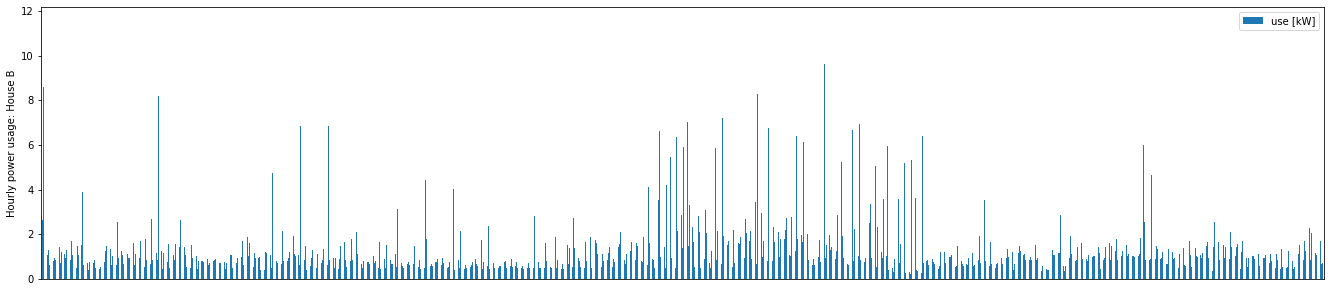

In [28]:
#plt.bar(homeb_hourly_df['Date & Time'], homeb_hourly_df['use [kW]'])
print(homeb_hourly_df['use [kW]'].describe())
plot_homeb_hourly = homeb_hourly_df.plot(kind='bar', x = 'Date & Time', y = 'use [kW]',figsize=(23,5))
plot_homeb_hourly.xaxis.set_visible(False)
plot_homeb_hourly.set_ylabel("Hourly power usage: House B")

count    8398.000000
mean       51.540812
std        48.400143
min         0.048000
25%        25.775000
50%        40.567117
75%        61.021271
max       574.811067
Name: use [kW], dtype: float64


Text(0, 0.5, 'Hourly power usage: House C')

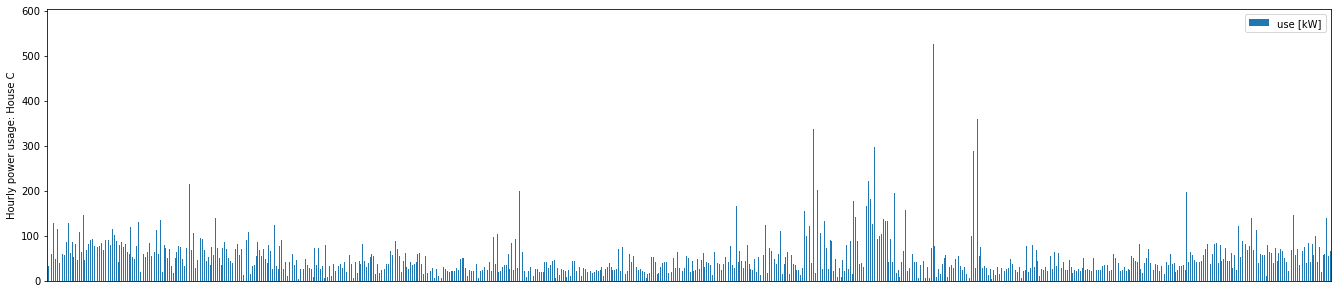

In [29]:
print(homec_hourly_df['use [kW]'].describe())
plot_homec_hourly = homec_hourly_df.plot(kind='bar', x = 'Date & Time', y = 'use [kW]',figsize=(23,5))
plot_homec_hourly.xaxis.set_visible(False)
plot_homec_hourly.set_ylabel("Hourly power usage: House C")

count    8398.000000
mean       96.378541
std        86.243906
min         0.000000
25%        37.982413
50%        60.103283
75%       120.700233
max       581.152450
Name: Usage [kW], dtype: float64


Text(0, 0.5, 'Hourly power usage: House F')

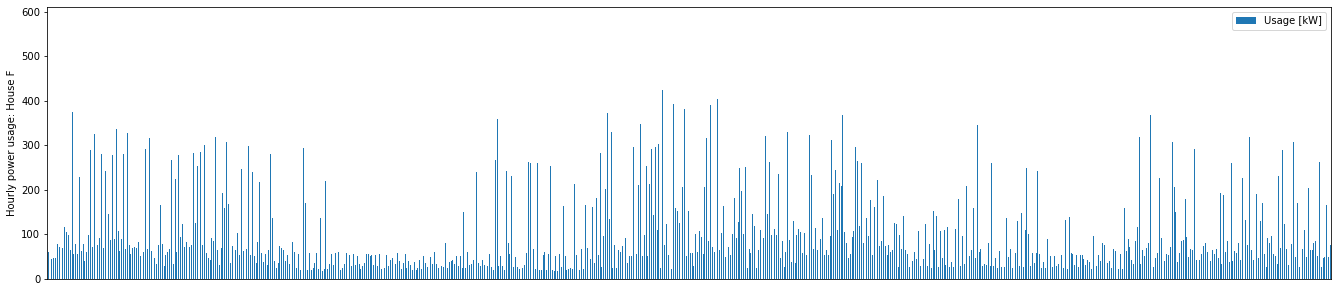

In [30]:
print(homef_hourly_df['Usage [kW]'].describe())
plot_homef_hourly = homef_hourly_df.plot(kind='bar', x = 'Date & Time', y = 'Usage [kW]',figsize=(23,5))
plot_homef_hourly.xaxis.set_visible(False)
plot_homef_hourly.set_ylabel("Hourly power usage: House F")

# # # Daily

count    365.000000
mean      31.819442
std       14.466709
min       10.572219
25%       21.660309
50%       27.108372
75%       37.879129
max       96.443073
Name: use [kW], dtype: float64


Text(0, 0.5, 'Daily power usage: House B')

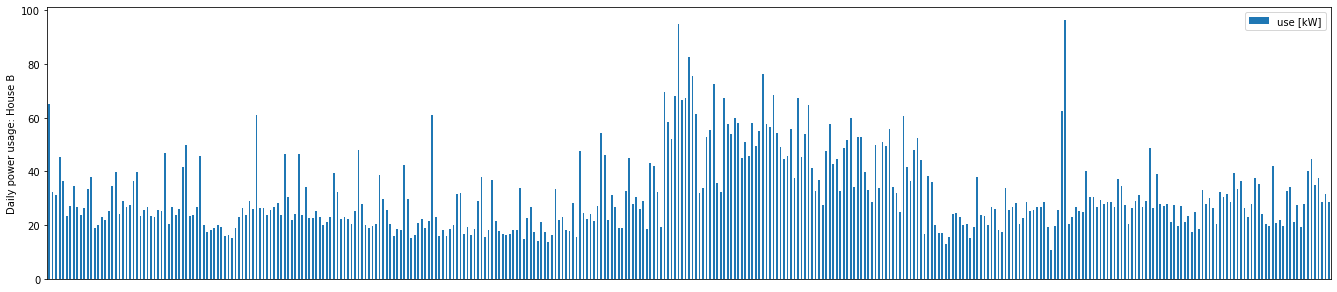

In [31]:
print(homeb_daily_df['use [kW]'].describe())
plot_homeb_daily = homeb_daily_df.plot(kind='bar', x = 'Date & Time', y = 'use [kW]',figsize=(23,5))
plot_homeb_daily.xaxis.set_visible(False)
plot_homeb_daily.set_ylabel("Daily power usage: House B")

count     350.000000
mean     1236.684973
std       680.553565
min       430.373867
25%       818.485533
50%      1071.454292
75%      1387.455538
max      5254.366733
Name: use [kW], dtype: float64


Text(0, 0.5, 'Daily power usage: House C')

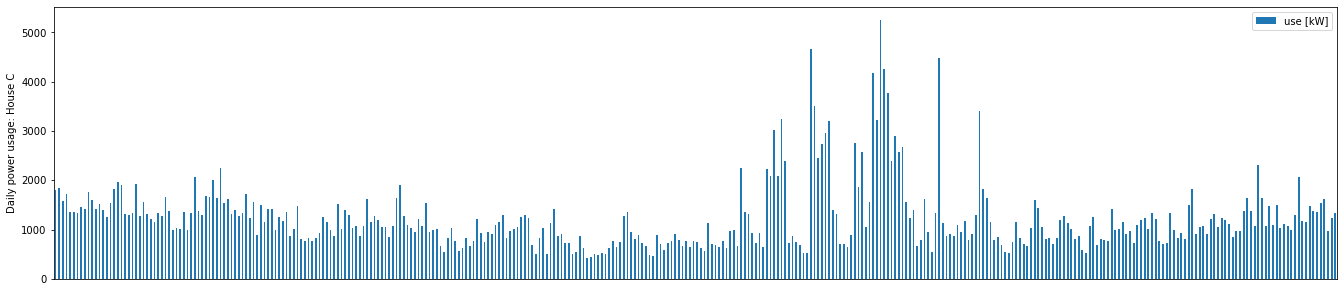

In [32]:
print(homec_daily_df['use [kW]'].describe())
plot_homec_daily = homec_daily_df.plot(kind='bar', x = 'Date & Time', y = 'use [kW]',figsize=(23,5))
plot_homec_daily.xaxis.set_visible(False)
plot_homec_daily.set_ylabel("Daily power usage: House C")

count     350.000000
mean     2312.534240
std       635.507639
min       841.572550
25%      1889.813592
50%      2278.626975
75%      2685.114629
max      4349.090050
Name: Usage [kW], dtype: float64


Text(0, 0.5, 'Daily power usage: House F')

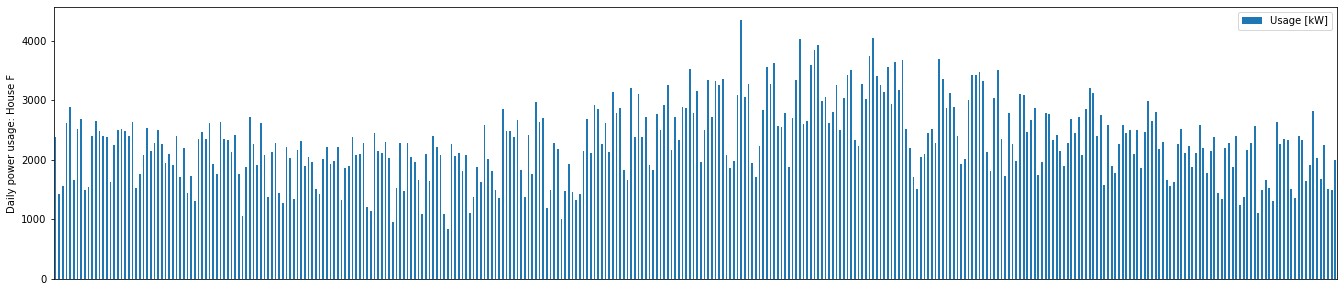

In [33]:
print(homef_daily_df['Usage [kW]'].describe())
plot_homef_daily = homef_daily_df.plot(kind='bar', x = 'Date & Time', y = 'Usage [kW]',figsize=(23,5))
plot_homef_daily.xaxis.set_visible(False)
plot_homef_daily.set_ylabel("Daily power usage: House F")

# # # Weekly

count     52.000000
mean     223.348008
std       75.739687
min      125.292188
25%      175.043376
50%      195.473557
75%      240.703998
max      419.109036
Name: use [kW], dtype: float64


<ipython-input-34-7ff462b57ea1>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  homeb_weekly_power_df = homeb_daily_power_df.groupby(homeb_daily_power_df["Date & Time"].dt.week).sum().reset_index()


Text(0, 0.5, 'Weekly power usage: House B')

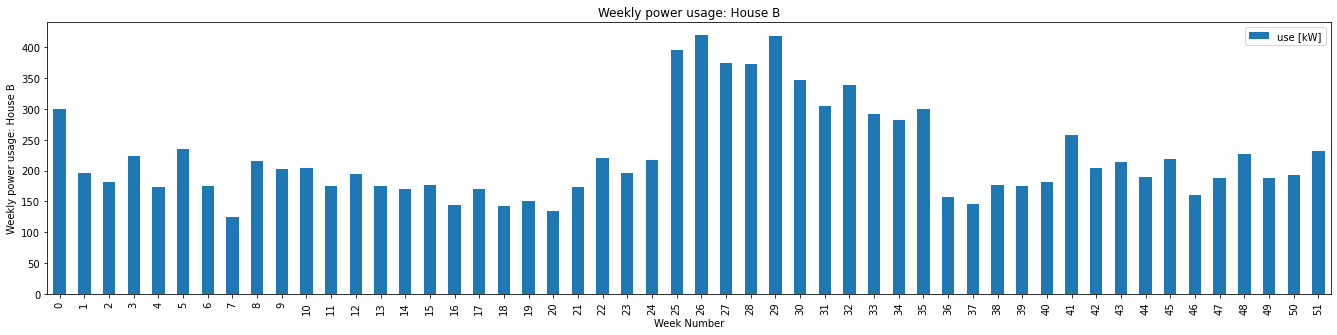

In [34]:
homeb_weekly_power_df = homeb_daily_power_df.groupby(homeb_daily_power_df["Date & Time"].dt.week).sum().reset_index()
print(homeb_weekly_power_df['use [kW]'].describe())
plot_weekly = homeb_weekly_power_df.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Weekly power usage: House B')
plot_weekly.set_xlabel("Week Number")
plot_weekly.set_ylabel("Weekly power usage: House B")

count       51.000000
mean      8487.053735
std       3638.271482
min       3879.041333
25%       6195.315875
50%       7725.073817
75%       9825.232367
max      22104.308783
Name: use [kW], dtype: float64


<ipython-input-35-d4f27c3ebfd3>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  homec_weekly_power_df = homec_daily_power_df.groupby(homec_daily_power_df["Date & Time"].dt.week).sum().reset_index()


Text(0, 0.5, 'Weekly power usage: House C')

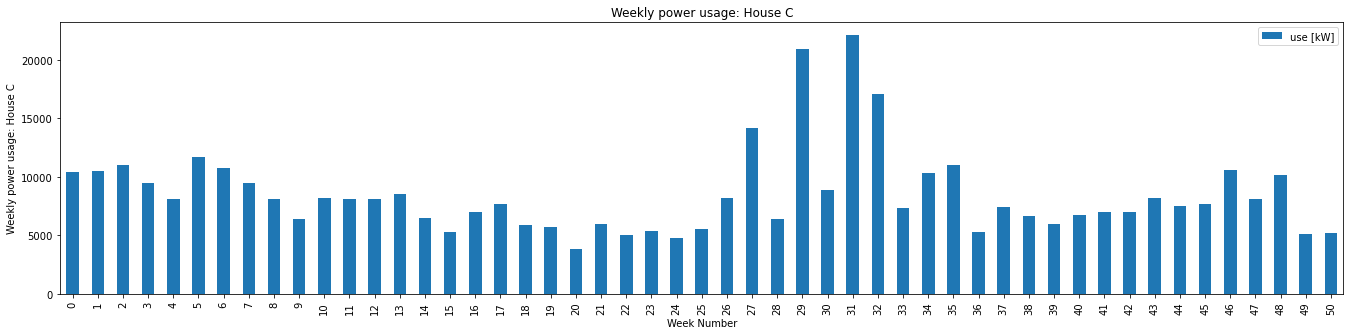

In [35]:
homec_weekly_power_df = homec_daily_power_df.groupby(homec_daily_power_df["Date & Time"].dt.week).sum().reset_index()
print(homec_weekly_power_df['use [kW]'].describe())
plot_weekly = homec_weekly_power_df.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Weekly power usage: House C')
plot_weekly.set_xlabel("Week Number")
plot_weekly.set_ylabel("Weekly power usage: House C")

count       51.000000
mean     15870.333019
std       3577.122702
min       5380.759650
25%      13488.453358
50%      15759.576950
75%      18101.961600
max      23893.800033
Name: Usage [kW], dtype: float64


<ipython-input-36-3e6c5e131959>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  homef_weekly_power_df = homef_daily_power_df.groupby(homef_daily_power_df["Date & Time"].dt.week).sum().reset_index()


Text(0, 0.5, 'Weekly power usage: House F')

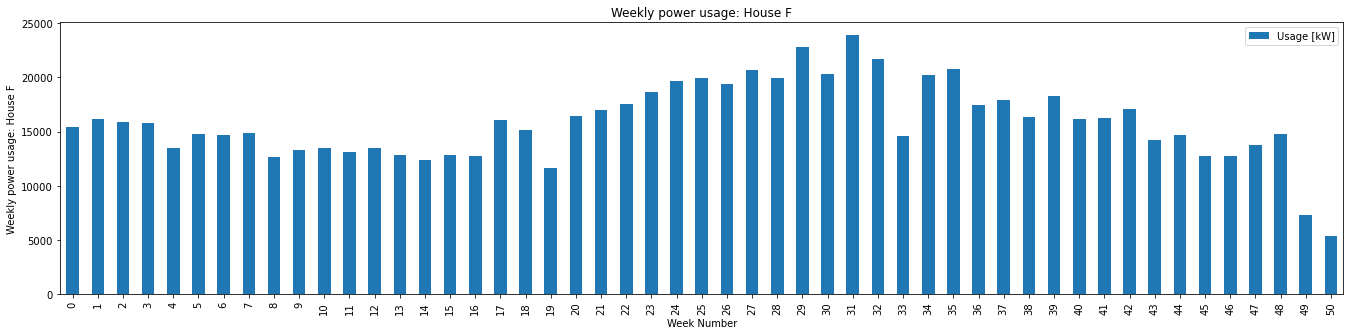

In [36]:
homef_weekly_power_df = homef_daily_power_df.groupby(homef_daily_power_df["Date & Time"].dt.week).sum().reset_index()
print(homef_weekly_power_df['Usage [kW]'].describe())
plot_weekly = homef_weekly_power_df.plot(kind='bar', y='Usage [kW]',figsize=(23,5),title='Weekly power usage: House F')
plot_weekly.set_xlabel("Week Number")
plot_weekly.set_ylabel("Weekly power usage: House F")

In [37]:
def power_comparison(homeb_df,homec_df, homef_df):
    homes=[]
    emaxs=[]
    emins=[]
    emeans=[]
    emedians=[]
    
    homes.append("B")
    emaxs.append(homeb_df['use [kW]'].max())
    emins.append(homeb_df['use [kW]'].min())
    emeans.append(homeb_df['use [kW]'].mean())
    emedians.append(homeb_df['use [kW]'].median())

    homes.append("C")
    emaxs.append(homec_df['use [kW]'].max())
    emins.append(homec_df['use [kW]'].min())
    emeans.append(homec_df['use [kW]'].mean())
    emedians.append(homec_df['use [kW]'].median())

    homes.append("F")
    emaxs.append(homef_df['Usage [kW]'].max())
    emins.append(homef_df['Usage [kW]'].min())
    emeans.append(homef_df['Usage [kW]'].mean())
    emedians.append(homef_df['Usage [kW]'].median())

    comparison = pd.DataFrame({
        'Home': homes,
        'Energy Maximum': emaxs,
        'Energy Minimum': emins,
        'Energy Mean': emeans,
        'Energy Median': emedians,
    })
    
    return comparison
    
comparison = power_comparison(homeb_weekly_power_df,homec_weekly_power_df,homef_weekly_power_df)    
display(comparison)

,Home,Energy Maximum,Energy Minimum,Energy Mean,Energy Median
0,B,419.109036,125.292188,223.348008,195.473557
1,C,22104.308783,3879.041333,8487.053735,7725.073817
2,F,23893.800033,5380.759650,15870.333019,15759.576950


# # # Monthly

count      12.000000
mean      967.841366
std       305.072658
min       654.486656
25%       800.514892
50%       898.745998
75%       985.176992
max      1711.816064
Name: use [kW], dtype: float64


Text(0, 0.5, 'Month power usage: House B')

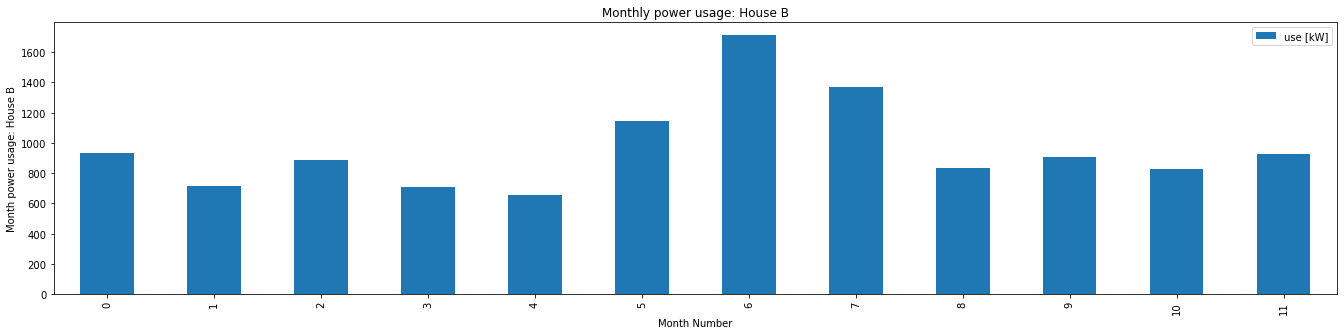

In [38]:
plot_homeb_monthly= homeb_daily_power_df.groupby(homeb_daily_power_df["Date & Time"].dt.month).sum().reset_index()
print(plot_homeb_monthly['use [kW]'].describe())
plot_monthly = plot_homeb_monthly.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Monthly power usage: House B')
plot_monthly.set_xlabel("Month Number")
plot_monthly.set_ylabel("Month power usage: House B")

count       12.000000
mean     36069.978372
std      12452.205249
min      19782.607000
25%      28690.317392
50%      32854.351533
75%      42738.032242
max      61866.223967
Name: use [kW], dtype: float64


Text(0, 0.5, 'Month power usage: House C')

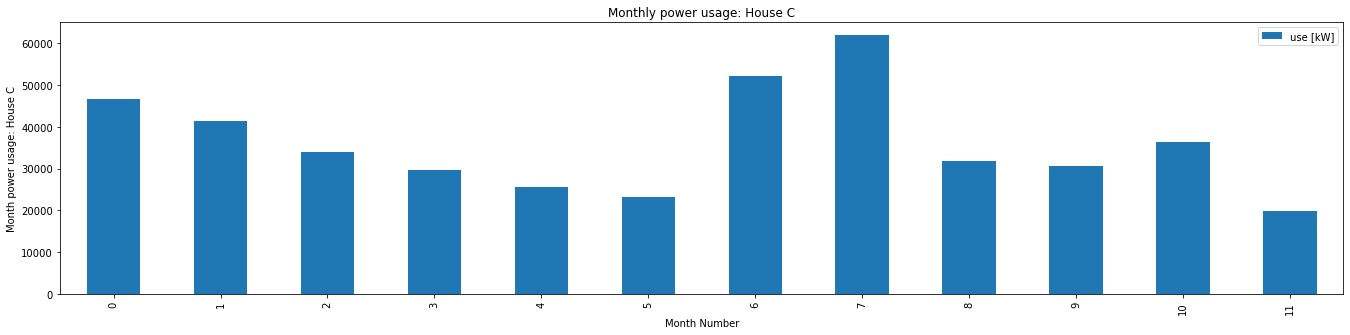

In [39]:
plot_homec_monthly= homec_daily_power_df.groupby(homec_daily_power_df["Date & Time"].dt.month).sum().reset_index()
print(plot_homec_monthly['use [kW]'].describe())
plot_monthly = plot_homec_monthly.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Monthly power usage: House C')
plot_monthly.set_xlabel("Month Number")
plot_monthly.set_ylabel("Month power usage: House C")

count       12.000000
mean     67448.915329
std      17059.982556
min      29601.658967
25%      59356.484050
50%      66961.108875
75%      79328.063492
max      90444.868083
Name: Usage [kW], dtype: float64


Text(0, 0.5, 'Month power usage: House F')

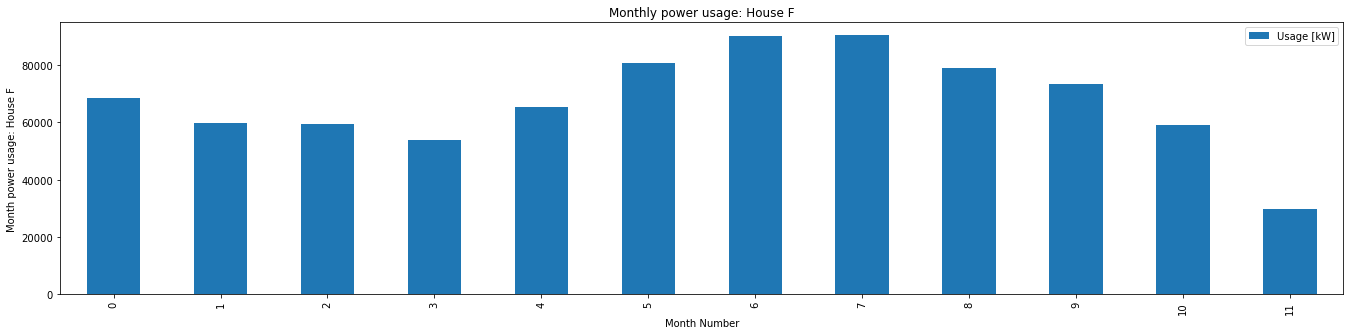

In [40]:
plot_homef_monthly= homef_daily_power_df.groupby(homef_daily_power_df["Date & Time"].dt.month).sum().reset_index()
print(plot_homef_monthly['Usage [kW]'].describe())
plot_monthly = plot_homef_monthly.plot(kind='bar', y='Usage [kW]',figsize=(23,5),title='Monthly power usage: House F')
plot_monthly.set_xlabel("Month Number")
plot_monthly.set_ylabel("Month power usage: House F")

In [41]:
comparison = power_comparison(plot_homeb_monthly,plot_homec_monthly,plot_homef_monthly)    
display(comparison)

,Home,Energy Maximum,Energy Minimum,Energy Mean,Energy Median
0,B,1711.816064,654.486656,967.841366,898.745998
1,C,61866.223967,19782.607000,36069.978372,32854.351533
2,F,90444.868083,29601.658967,67448.915329,66961.108875


Inference - Seasons/ Vacations

On Visualising the graphs, we can infer some patterns
Hourly graphs have a spiky nature which can suggest that power consumption is more during daytime than night
On looking at other graphs on a high level, house b shows that there was high power usage during summer and some anamolies of high consumption in October. After summer, we can see that there is relatively high usage in december and january as well, which could suggest heavy usage of appliances during winter too.
House C has high usage in Summer and January. Could be inferred as Winter is late here or January could be the coldest time where heating appliances might be used.
House F has the highest power consumption across all homes with November and December being the lowest. 
On all three houses, highest power consumption is in mid year, which could suggest summer months. Winter usage pattern is slightly different in all the three homes. Unrelated to season, Winter also suggests Christmas time. Could be a probability that House A has most guests during this time, which increases the relative power consumption when we see across the year. For C and F, it is slightly lower than the rest of the year.

# # Prediction Models

I have used three prediction models including linear regression, random forest and a time series model, ARIMA to analyze differnce between traditional and time-series models. Mean absolute error is used to compare efficiency of models. Data Sets are devided as given in the question. Training data is used for data upto November and is getting tested against December data set. Naive model is used as the baseline model as mentioned in the question which uses the last observed value as the prediction for all steps into the future.

# Naive Model

In [42]:
models.append("Naive")

naive_type=[]
naive_mae=[]

def naivePredictionHourly(inputDF, split, home):
    power_train = inputDF[0:split]
    power_test = inputDF[split:]
    
    if (home == 'f'):
        p_train = power_train['Usage [kW]'].to_numpy()
    else:
        p_train = power_train['use [kW]'].to_numpy()
    
    power_predict = power_test.copy()
    power_predict['naive'] = p_train[split-1]
    
    return power_train,power_test,power_predict

# # # Hourly

HOME B

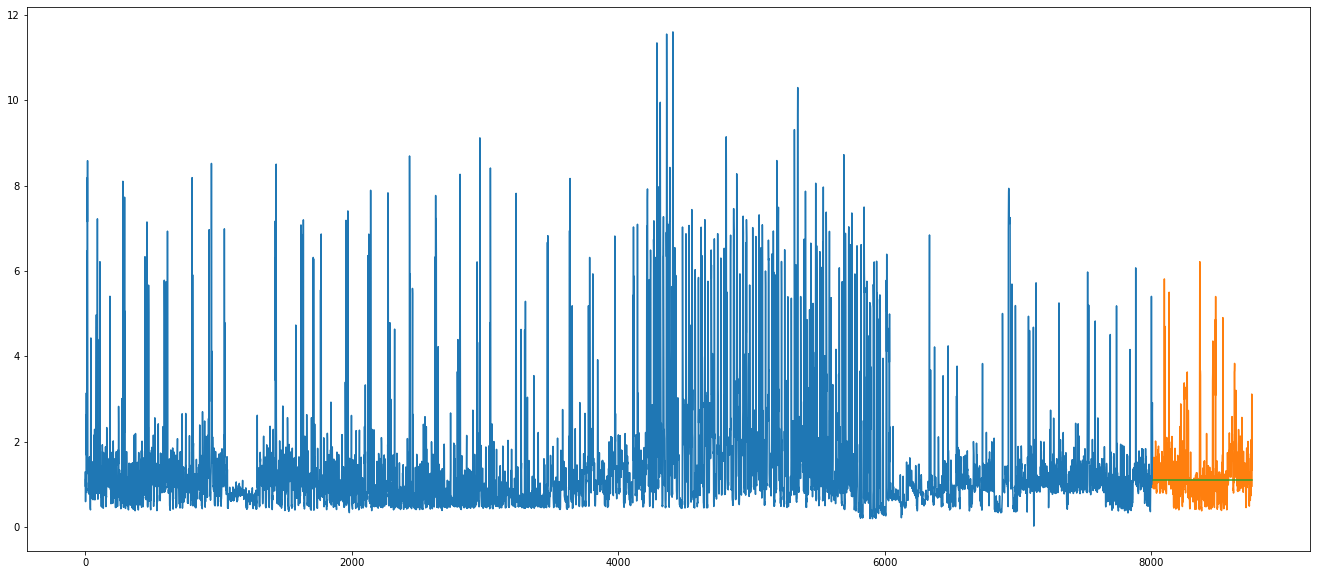

Home B Hourly MAE :  0.4795294990740242


In [43]:
power_hourly_train,power_hourly_test,power_hour_predict = naivePredictionHourly(homeb_hourly_power_df, 8016, 'b')
plt.figure(figsize=(23,10))
plt.plot(power_hourly_train.index, power_hourly_train['use [kW]'], label='Train')
plt.plot(power_hourly_test.index, power_hourly_test['use [kW]'], label='Test')
plt.plot(power_hour_predict.index, power_hour_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_hourly_test['use [kW]'], power_hour_predict['naive'])
hbhourlymae.append(error)
print("Home B Hourly MAE : ", error)
naive_type.append("Home B Hourly")
naive_mae.append(error)

HOME C

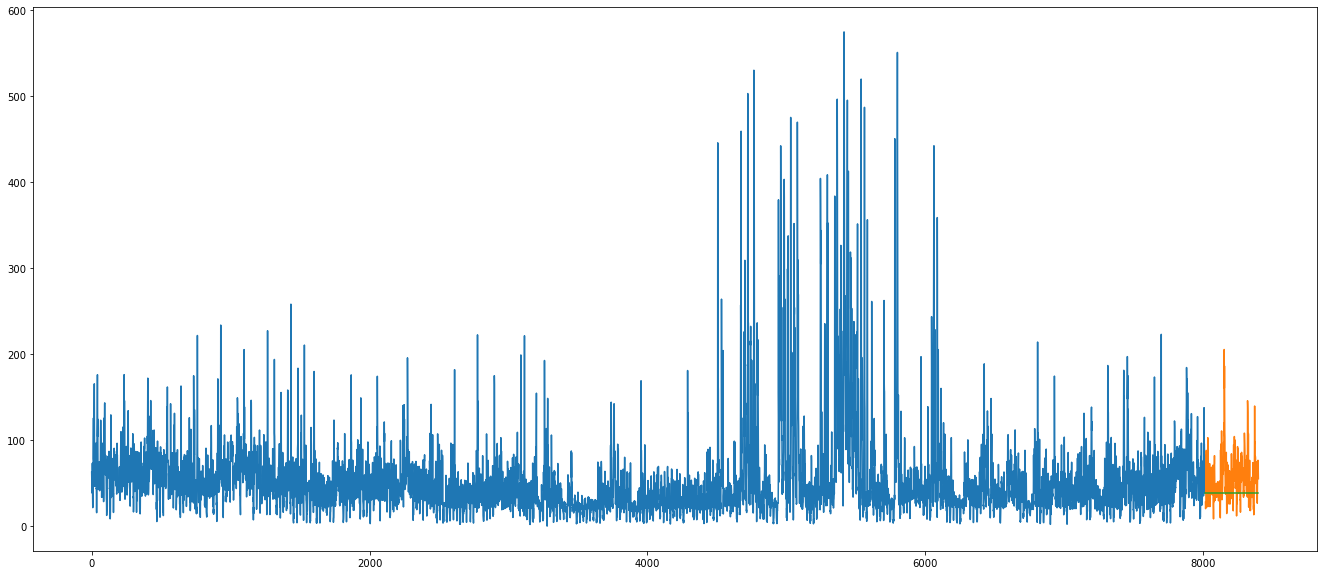

Home C Hourly MAE :  21.205396902096854


In [44]:
power_hourly_train,power_hourly_test,power_hour_predict = naivePredictionHourly(homec_hourly_power_df, 8016, 'c')
plt.figure(figsize=(23,10))
plt.plot(power_hourly_train.index, power_hourly_train['use [kW]'], label='Train')
plt.plot(power_hourly_test.index, power_hourly_test['use [kW]'], label='Test')
plt.plot(power_hour_predict.index, power_hour_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_hourly_test['use [kW]'], power_hour_predict['naive'])
hchourlymae.append(error)
print("Home C Hourly MAE : ", error)
naive_type.append("Home C Hourly")
naive_mae.append(error)

HOME F

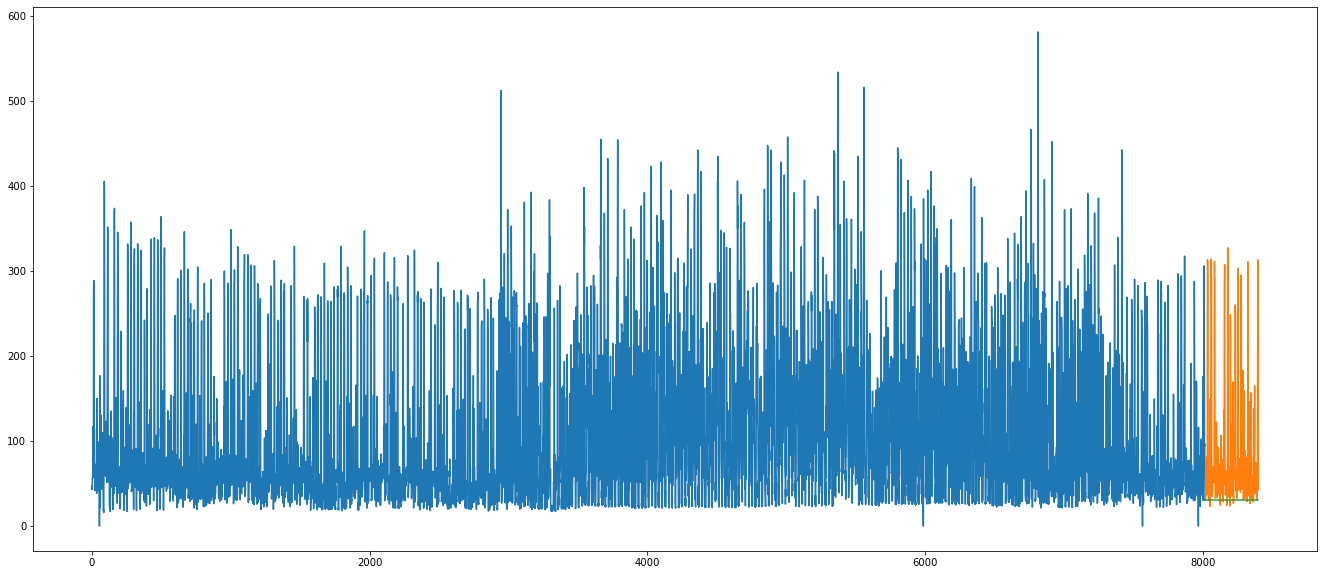

Home F Hourly MAE :  52.92960540952879


In [45]:
power_hourly_train,power_hourly_test,power_hour_predict = naivePredictionHourly(homef_hourly_power_df, 8016, 'f')
plt.figure(figsize=(23,10))
plt.plot(power_hourly_train.index, power_hourly_train['Usage [kW]'], label='Train')
plt.plot(power_hourly_test.index, power_hourly_test['Usage [kW]'], label='Test')
plt.plot(power_hour_predict.index, power_hour_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_hourly_test['Usage [kW]'], power_hour_predict['naive'])
hfhourlymae.append(error)
print("Home F Hourly MAE : ", error)
naive_type.append("Home F Hourly")
naive_mae.append(error)

# # # Daily

HOME B

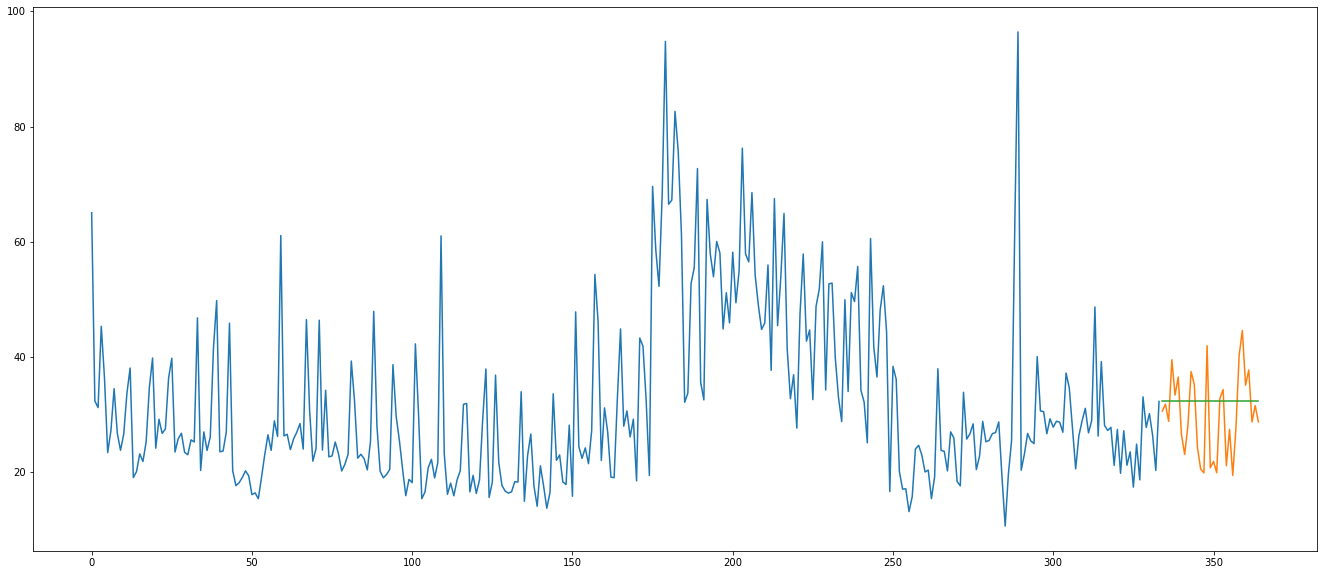

Home B Daily MAE :  6.272363512870969


In [46]:
power_daily_train,power_daily_test,power_day_predict = naivePredictionHourly(homeb_daily_power_df, 334, 'b')
plt.figure(figsize=(23,10))
plt.plot(power_daily_train.index, power_daily_train['use [kW]'], label='Train')
plt.plot(power_daily_test.index, power_daily_test['use [kW]'], label='Test')
plt.plot(power_day_predict.index, power_day_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_daily_test['use [kW]'], power_day_predict['naive'])
hbdailymae.append(error)
print("Home B Daily MAE : ", error)
naive_type.append("Home B Daily")
naive_mae.append(error)

HOME C

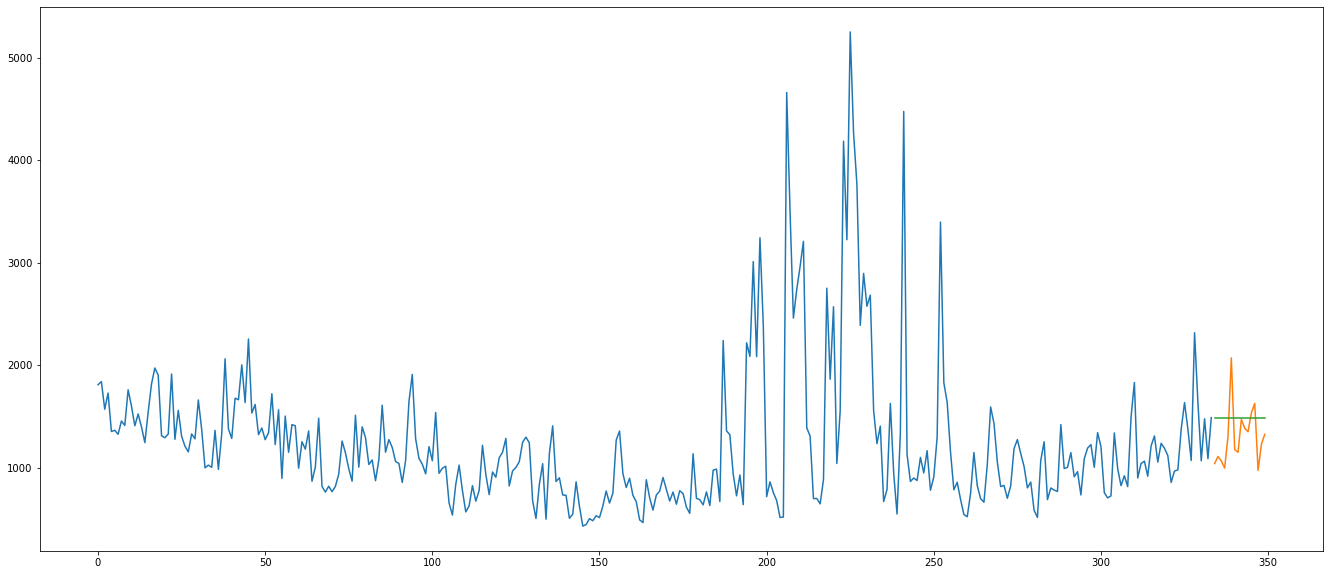

Home C Daily MAE :  284.16550626137496


In [47]:
power_daily_train,power_daily_test,power_day_predict = naivePredictionHourly(homec_daily_power_df, 334, 'c')
plt.figure(figsize=(23,10))
plt.plot(power_daily_train.index, power_daily_train['use [kW]'], label='Train')
plt.plot(power_daily_test.index, power_daily_test['use [kW]'], label='Test')
plt.plot(power_day_predict.index, power_day_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_daily_test['use [kW]'], power_day_predict['naive'])
hcdailymae.append(error)
print("Home C Daily MAE : ", error)
naive_type.append("Home C Daily")
naive_mae.append(error)

HOME F

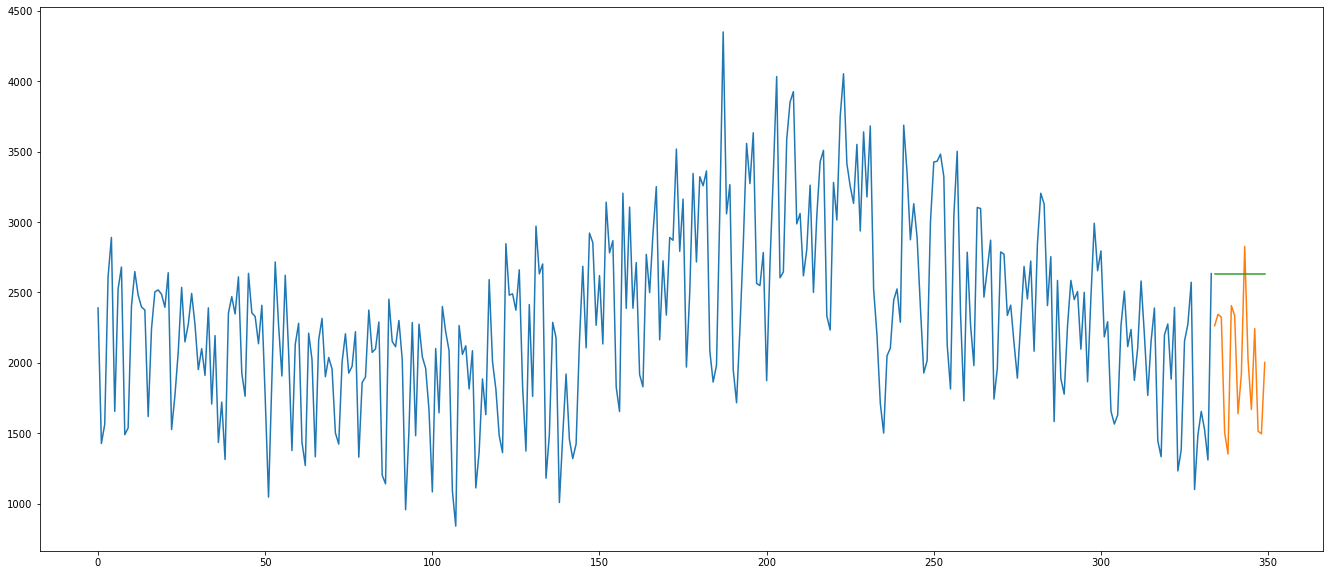

Home F Daily MAE :  666.0622948081248


In [48]:
power_daily_train,power_daily_test,power_day_predict = naivePredictionHourly(homef_daily_power_df, 334, 'f')
plt.figure(figsize=(23,10))
plt.plot(power_daily_train.index, power_daily_train['Usage [kW]'], label='Train')
plt.plot(power_daily_test.index, power_daily_test['Usage [kW]'], label='Test')
plt.plot(power_day_predict.index, power_day_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_daily_test['Usage [kW]'], power_day_predict['naive'])
hfdailymae.append(error)
print("Home F Daily MAE : ", error)
naive_type.append("Home F Daily")
naive_mae.append(error)

In [49]:
print("NAIVE METHOD")

comparison = pd.DataFrame({
        'Type': naive_type,
        'MAE': naive_mae,
    })

display(comparison)

NAIVE METHOD


,Type,MAE
0,Home B Hourly,0.479529
1,Home C Hourly,21.205397
2,Home F Hourly,52.929605
3,Home B Daily,6.272364
4,Home C Daily,284.165506
5,Home F Daily,666.062295


# # Co-relation

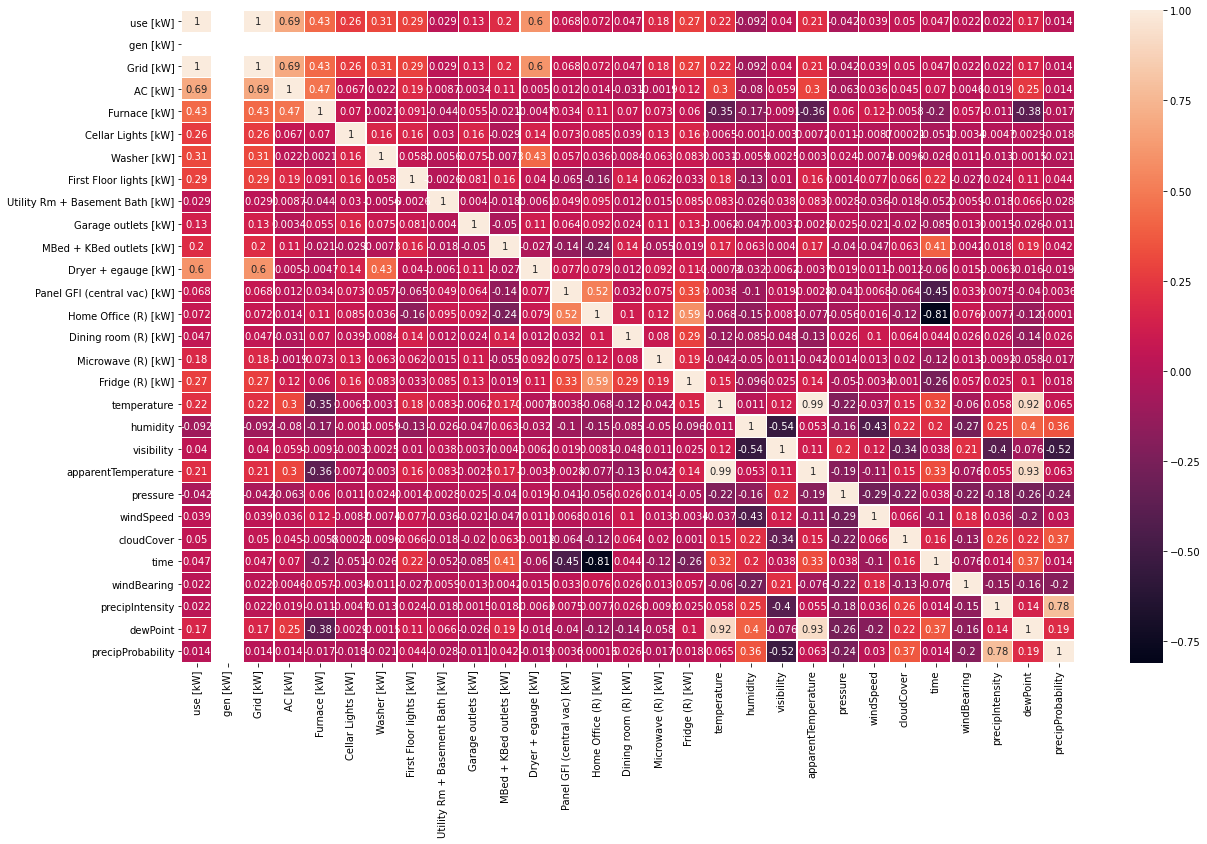

In [50]:
corr_traindf=homeb_hourly_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_traindf, annot=True, linewidths=.5)
plt.show()

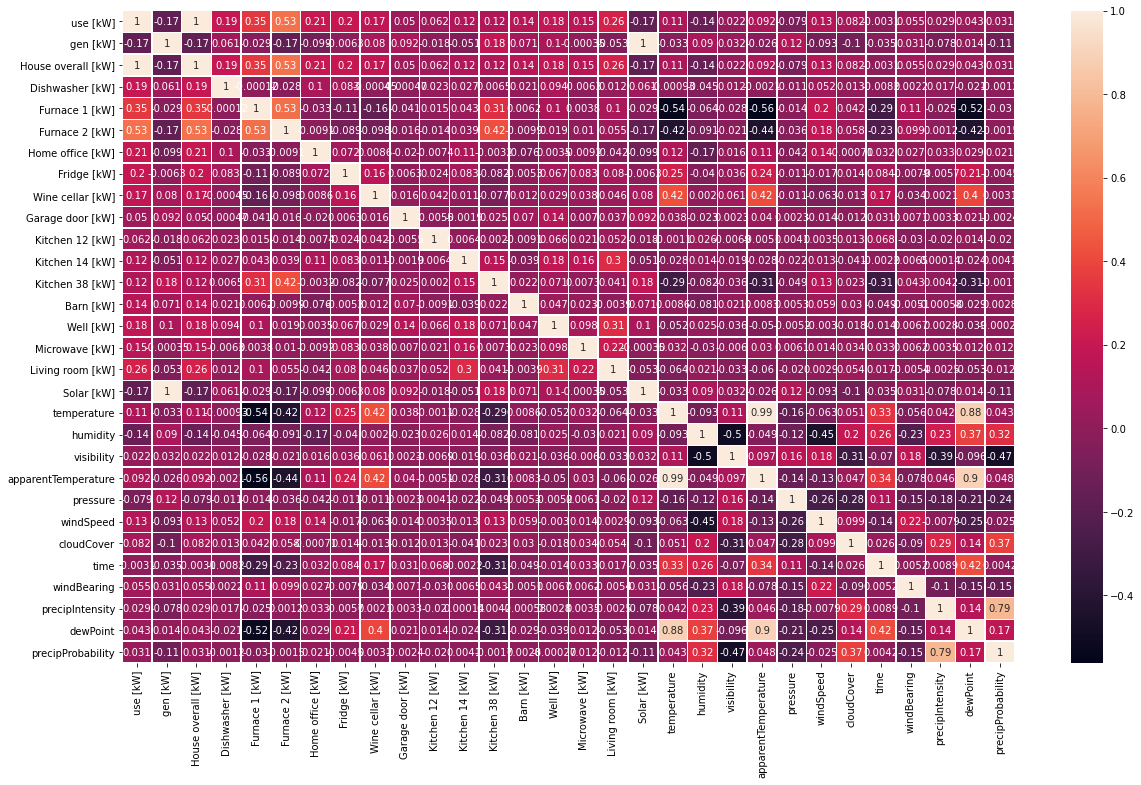

In [51]:
corr_traindf=homec_hourly_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_traindf, annot=True, linewidths=.5)
plt.show()

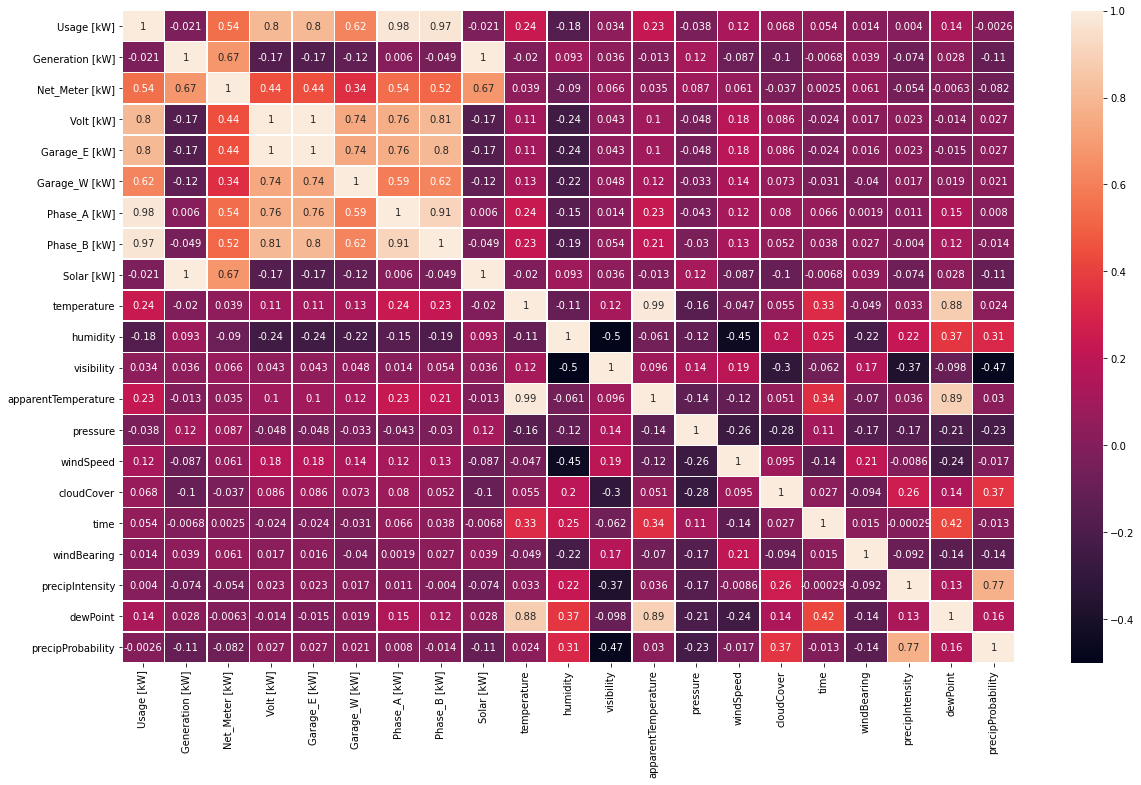

In [52]:
corr_traindf=homef_hourly_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_traindf, annot=True, linewidths=.5)
plt.show()

# # Linear Regression

First for each row we are assigning the next hour/day's power demand to the row as a new column "predicted" as part of our train data results (ytrain). We are then seperating data randomly from the entire dataset into training, validation and testing sets respectively using "train_test_split". We are then fitting training data to the regressor and then predicting test results using the given regressor. Finally, we calculate mean absolute error for each prediction

In [53]:
#Linear Regression
models.append("Linear Regression")

regression = linear_model.LinearRegression()
linear_regression_type=[]
linear_regression_mae=[]

best_temperature_df = homeb_hourly_df

def getLinearRegressionMAE(input_df,temperature_df, split):
    kw_train = input_df[0:split]
    kw_test = input_df[split:]
    temperature_train = temperature_df[0:split]
    temperature_test = temperature_df[split:]
    regression.fit(temperature_train, kw_train)
    kw_prediction = regression.predict(temperature_test)
    error= mean_absolute_error(kw_test, kw_prediction)
    return error

def getBestLinearRegressionFeaturesDF(inputDf, split, home):
    minError = 1000
    features=[]
    linear_mae_error=[]
    
    temperature_df = inputDf[['temperature','apparentTemperature','dewPoint']]
    features.append("'temperature','apparentTemperature','dewPoint'")

    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)

    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['temperature','apparentTemperature']]
    features.append("'temperature','apparentTemperature'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['temperature']]
    features.append("'temperature'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['apparentTemperature']]
    features.append("'apparentTemperature'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['apparentTemperature','dewPoint']]
    features.append("'apparentTemperature','dewPoint'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)    
    
    linear_mae_error.append(error)
    
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['dewPoint']]
    features.append("'dewPoint'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['temperature','dewPoint']]
    features.append("'temperature','dewPoint'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    finalcomparison = pd.DataFrame({
        'Features': features,
        'MAE error': linear_mae_error,
    })
    display(finalcomparison)
    return best_temperature_df

# # # Hourly

,Features,MAE error
0,"'temperature','apparentTemperature','dewPoint'",0.477976
1,"'temperature','apparentTemperature'",0.487377
2,'temperature',0.471592
3,'apparentTemperature',0.472414
4,"'apparentTemperature','dewPoint'",0.462008
5,'dewPoint',0.495423
6,"'temperature','dewPoint'",0.461046


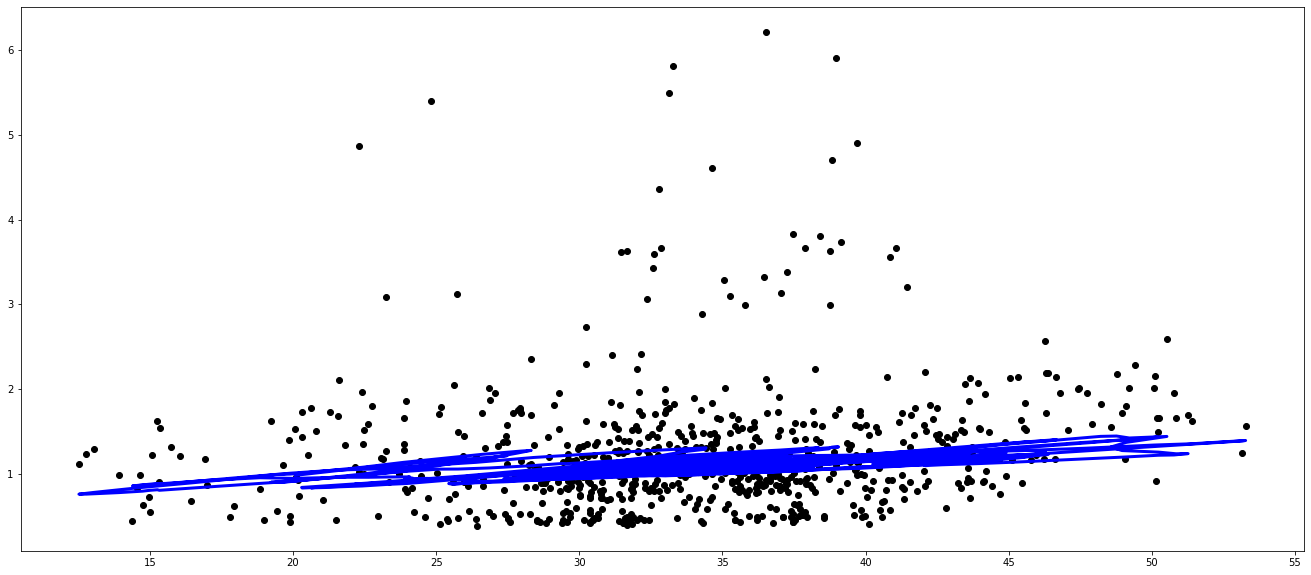

Linear Regression: Home B Hourly MAE :  0.46104649537201425


In [54]:
kw_hourly_df = homeb_hourly_df[['use [kW]']]
kw_train = kw_hourly_df[0:8016]
kw_test = kw_hourly_df[8016:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homeb_hourly_df, 8016, 'b')

temperature_train = best_temperature_df[0:8016]
temperature_test = best_temperature_df[8016:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['temperature'], kw_test,  color='black')
plt.plot(temperature_test['temperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hbhourlymae.append(error)
print("Linear Regression: Home B Hourly MAE : ", error)
linear_regression_type.append("Home B Hourly")
linear_regression_mae.append(error)

,Features,MAE error
0,"'temperature','apparentTemperature','dewPoint'",19.720807
1,"'temperature','apparentTemperature'",20.013013
2,'temperature',19.482896
3,'apparentTemperature',19.436864
4,"'apparentTemperature','dewPoint'",18.928791
5,'dewPoint',19.269901
6,"'temperature','dewPoint'",18.875593


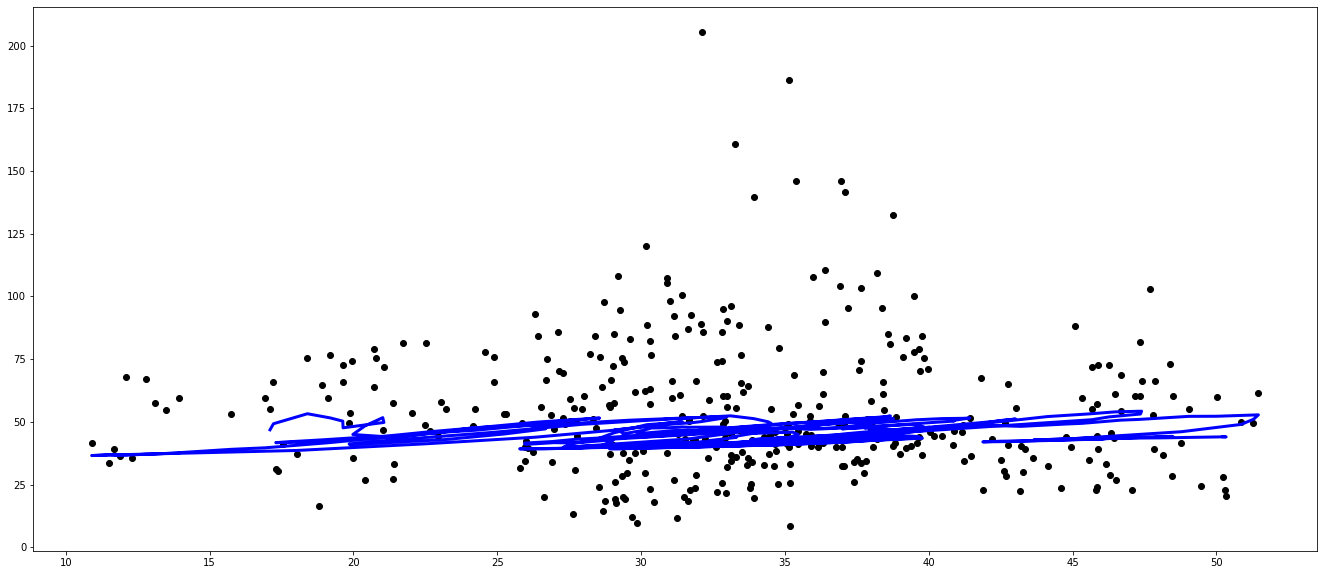

Linear Regression: Home C Hourly MAE :  18.87559320429917


In [55]:
kw_hourly_df = homec_hourly_df[['use [kW]']]
kw_train = kw_hourly_df[0:8016]
kw_test = kw_hourly_df[8016:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homec_hourly_df, 8016, 'c')

temperature_train = best_temperature_df[0:8016]
temperature_test = best_temperature_df[8016:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['temperature'], kw_test,  color='black')
plt.plot(temperature_test['temperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hchourlymae.append(error)
print("Linear Regression: Home C Hourly MAE : ", error)
linear_regression_type.append("Home C Hourly")
linear_regression_mae.append(error)

,Features,MAE error
0,"'temperature','apparentTemperature','dewPoint'",44.415513
1,"'temperature','apparentTemperature'",45.913654
2,'temperature',45.909311
3,'apparentTemperature',46.914235
4,"'apparentTemperature','dewPoint'",44.471845
5,'dewPoint',52.632133
6,"'temperature','dewPoint'",43.640167


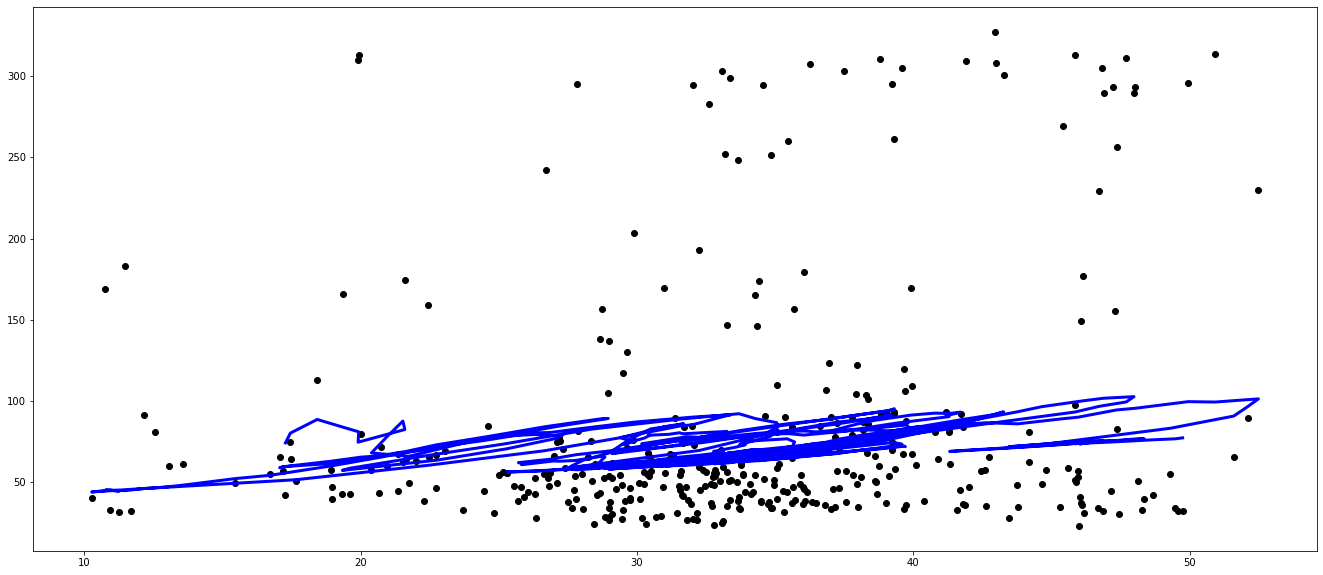

Linear Regression: Home F Hourly MAE :  43.640166623494395


In [56]:
kw_hourly_df = homef_hourly_df[['Usage [kW]']]
kw_train = kw_hourly_df[0:8016]
kw_test = kw_hourly_df[8016:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homef_hourly_df, 8016, 'f')

temperature_train = best_temperature_df[0:8016]
temperature_test = best_temperature_df[8016:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['temperature'], kw_test,  color='black')
plt.plot(temperature_test['temperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hfhourlymae.append(error)
print("Linear Regression: Home F Hourly MAE : ", error)
linear_regression_type.append("Home F Hourly")
linear_regression_mae.append(error)

# # # Daily

,Features,MAE error
0,"'temperature','apparentTemperature','dewPoint'",6.387254
1,"'temperature','apparentTemperature'",6.328855
2,'temperature',5.965023
3,'apparentTemperature',5.946851
4,"'apparentTemperature','dewPoint'",6.266157
5,'dewPoint',6.266756
6,"'temperature','dewPoint'",5.965290


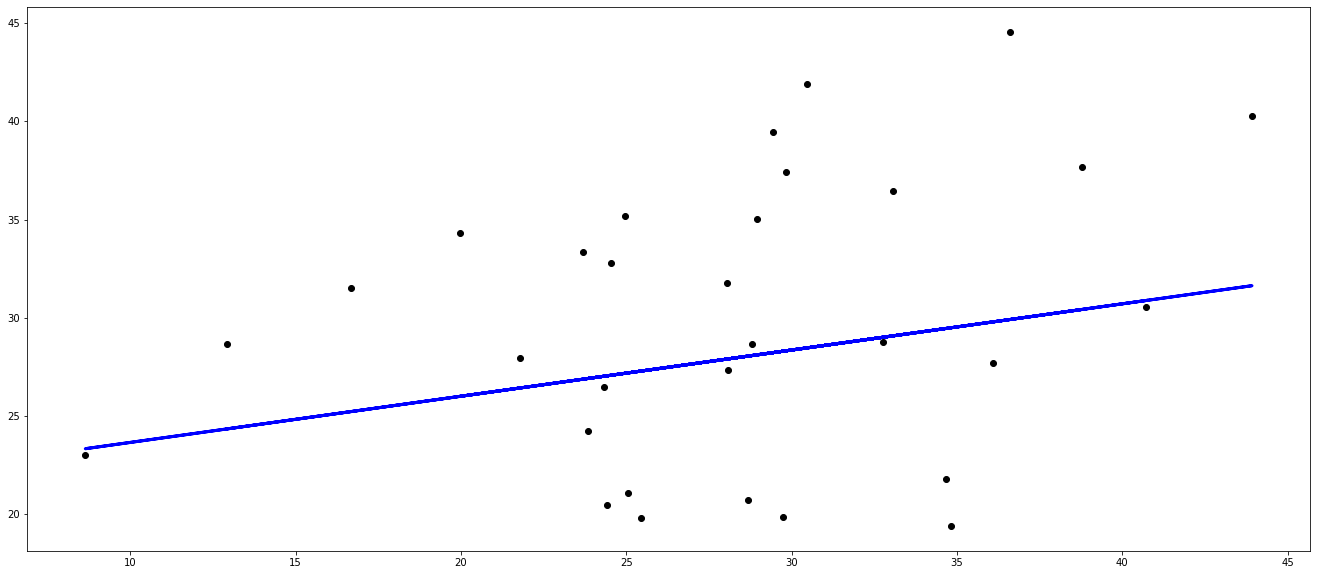

Linear Regression: Home B Daily MAE :  5.94685134601658


In [57]:
best_temperature_df = homeb_daily_df

kw_daily_df = homeb_daily_df[['use [kW]']]

kw_train = kw_daily_df[0:334]
kw_test = kw_daily_df[334:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homeb_daily_df, 334, 'b')

temperature_train = best_temperature_df[0:334]
temperature_test = best_temperature_df[334:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['apparentTemperature'], kw_test,  color='black')
plt.plot(temperature_test['apparentTemperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hbdailymae.append(error)
print("Linear Regression: Home B Daily MAE : ", error)
linear_regression_type.append("Home B Daily")
linear_regression_mae.append(error)

,Features,MAE error
0,"'temperature','apparentTemperature','dewPoint'",310.260317
1,"'temperature','apparentTemperature'",311.858344
2,'temperature',224.547712
3,'apparentTemperature',214.918681
4,"'apparentTemperature','dewPoint'",239.100391
5,'dewPoint',233.524333
6,"'temperature','dewPoint'",227.829782


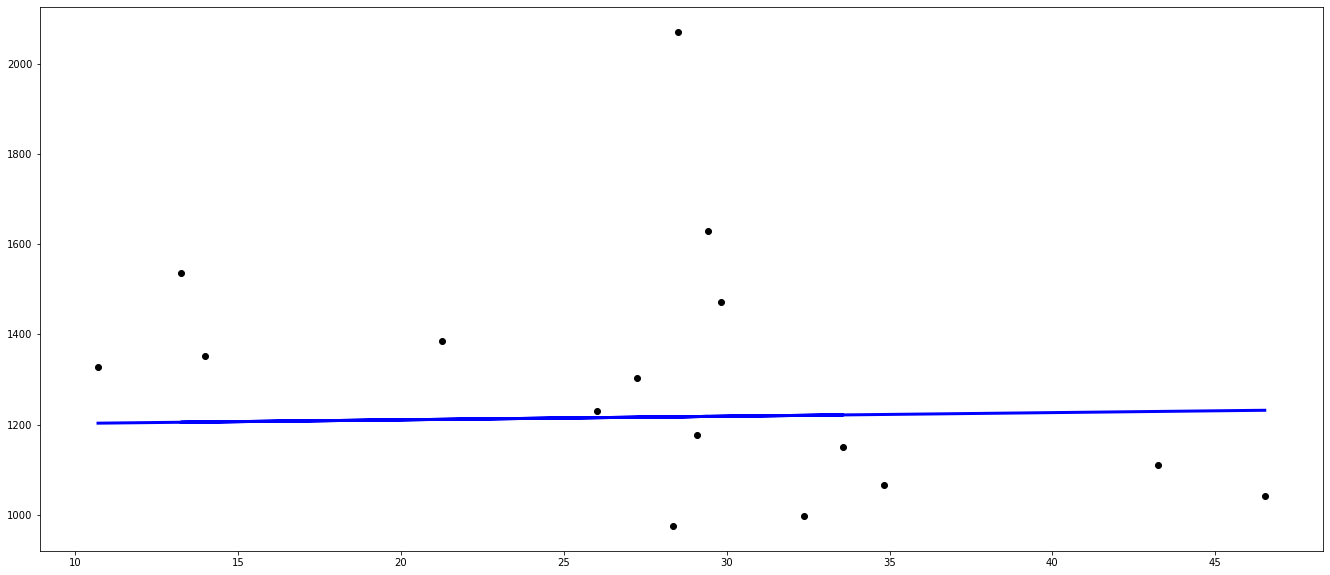

Linear Regression: Home C Daily MAE :  214.91868102881963


In [58]:
kw_daily_df = homec_daily_df[['use [kW]']]

kw_train = kw_daily_df[0:334]
kw_test = kw_daily_df[334:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homec_daily_df, 334, 'c')

temperature_train = best_temperature_df[0:334]
temperature_test = best_temperature_df[334:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['apparentTemperature'], kw_test,  color='black')
plt.plot(temperature_test['apparentTemperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hcdailymae.append(error)
print("Linear Regression: Home C Daily MAE : ", error)
linear_regression_type.append("Home C Daily")
linear_regression_mae.append(error)

,Features,MAE error
0,"'temperature','apparentTemperature','dewPoint'",344.813296
1,"'temperature','apparentTemperature'",369.251523
2,'temperature',342.478149
3,'apparentTemperature',344.611132
4,"'apparentTemperature','dewPoint'",344.391031
5,'dewPoint',346.626466
6,"'temperature','dewPoint'",341.328112


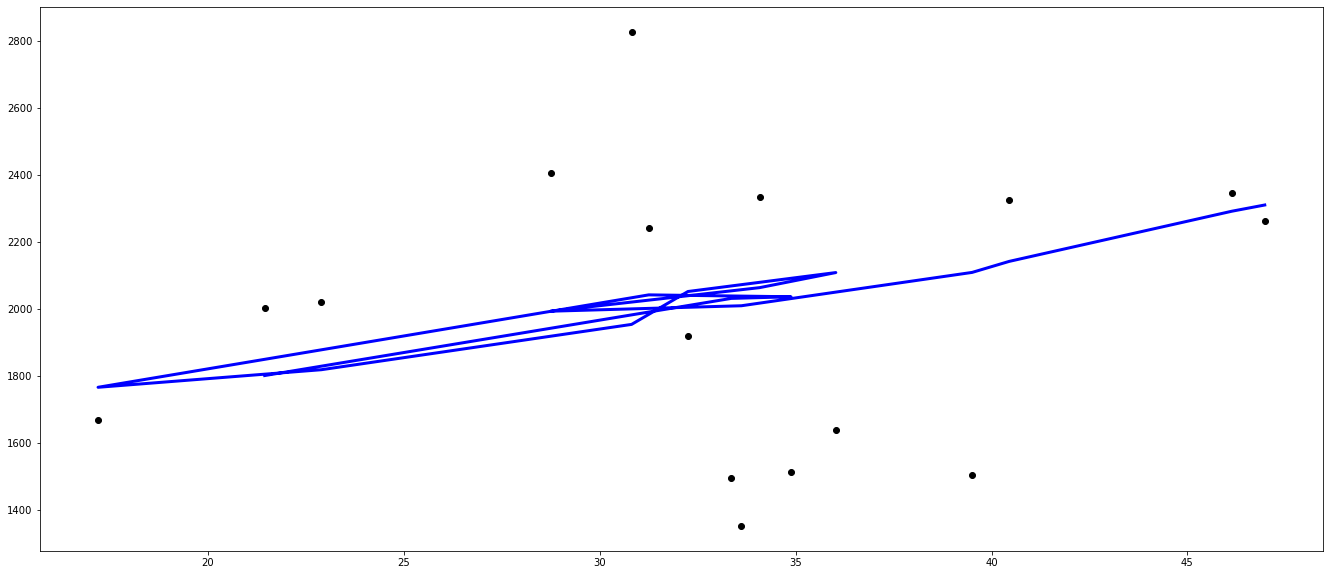

Linear Regression: Home F Daily MAE :  341.3281124248565


In [59]:
kw_daily_df = homef_daily_df[['Usage [kW]']]

kw_train = kw_daily_df[0:334]
kw_test = kw_daily_df[334:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homef_daily_df, 334, 'f')

temperature_train = best_temperature_df[0:334]
temperature_test = best_temperature_df[334:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test[best_temperature_df.columns[0]], kw_test,  color='black')
plt.plot(temperature_test[best_temperature_df.columns[0]], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hfdailymae.append(error)
print("Linear Regression: Home F Daily MAE : ", error)
linear_regression_type.append("Home F Daily")
linear_regression_mae.append(error)

In [60]:
print("Linear Regression Method")

comparison = pd.DataFrame({
        'Type': linear_regression_type,
        'MAE': linear_regression_mae,
    })

display(comparison)

Linear Regression Method


,Type,MAE
0,Home B Hourly,0.461046
1,Home C Hourly,18.875593
2,Home F Hourly,43.640167
3,Home B Daily,5.946851
4,Home C Daily,214.918681
5,Home F Daily,341.328112


# # Random Forest

In this model, for each row we are assigning the next hour/day's power demand to the row as a new column "predicted" as part of our train data results (ytrain). We are then seperating data randomly from the entire dataset into training, validation and testing sets respectively using "train_test_split". We are then fitting training data to the model and then predicting test results using the given model. Finally, we calculate mean absolute error for each prediction. Optimal value of tree depth is chosen based on optimal value of mean absolute error on validation set.

In [61]:
models.append("Random Forest")

best_temperature_df = homeb_hourly_df
depth = 0
randomforest_type=[]
randomforest_mae=[]

def getBestRandomForestDF(input_df, split, home):
    minError = 1000
    features=[]
    random_mae_error=[]
    random_depth=[]
    
    inputDf = input_df.copy()
    
    if (home == 'f'):
        power = inputDf[['Usage [kW]']]
    else:
        power = inputDf[['use [kW]']]
    
    power_train = power[0:split]
    power_test = power[split:]
    i = 1;
    while (i<=10):
        regr = RandomForestRegressor(max_depth=i)  
    
        temperature_df = inputDf[['temperature','apparentTemperature','dewPoint']]
        features.append("'temperature','apparentTemperature','dewPoint'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]

        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['temperature','apparentTemperature']]
        features.append("'temperature','apparentTemperature'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['temperature']]
        features.append("'temperature'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['apparentTemperature']]
        features.append("'apparentTemperature'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['dewPoint']]
        features.append("'dewPoint'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['apparentTemperature','dewPoint']]
        features.append("'apparentTemperature','dewPoint'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['temperature','dewPoint']]
        features.append("'temperature','dewPoint'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i
        
        i=i+1
        
    finalcomparison = pd.DataFrame({
        'Depth': random_depth,
        'Features': features,
        'MAE error': random_mae_error,
    })
    display(finalcomparison)
    return best_temperature_df, depth


# # # Hourly

In [62]:
best_temperature_df, depth = getBestRandomForestDF(homeb_hourly_df, 8016, 'b')
power = homeb_hourly_df[['use [kW]']]
power_train = power[0:8016]
power_test = power[8016:]
temp_train = best_temperature_df[0:8016]
temp_test = best_temperature_df[8016:]
regr = RandomForestRegressor(max_depth=depth)  
regr.fit(temp_train, power_train)
kw_prediction = regr.predict(temp_test)
error = mean_absolute_error(power_test, kw_prediction) 

<ipython-input-61-e619f294ea70>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:88: DataConversionWarning: A column-vector y was passed when

,Depth,Features,MAE error
0,1,"'temperature','apparentTemperature','dewPoint'",0.488675
1,1,"'temperature','apparentTemperature'",0.489084
2,1,'temperature',0.489092
3,1,'apparentTemperature',0.488742
4,1,'dewPoint',0.487319
...,...,...,...
65,10,'temperature',0.480378
66,10,'apparentTemperature',0.482282
67,10,'dewPoint',0.493353
68,10,"'apparentTemperature','dewPoint'",0.487132


Index(['temperature', 'apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 7
Random Forest: Home B Hourly MAE:  0.4777122850367536


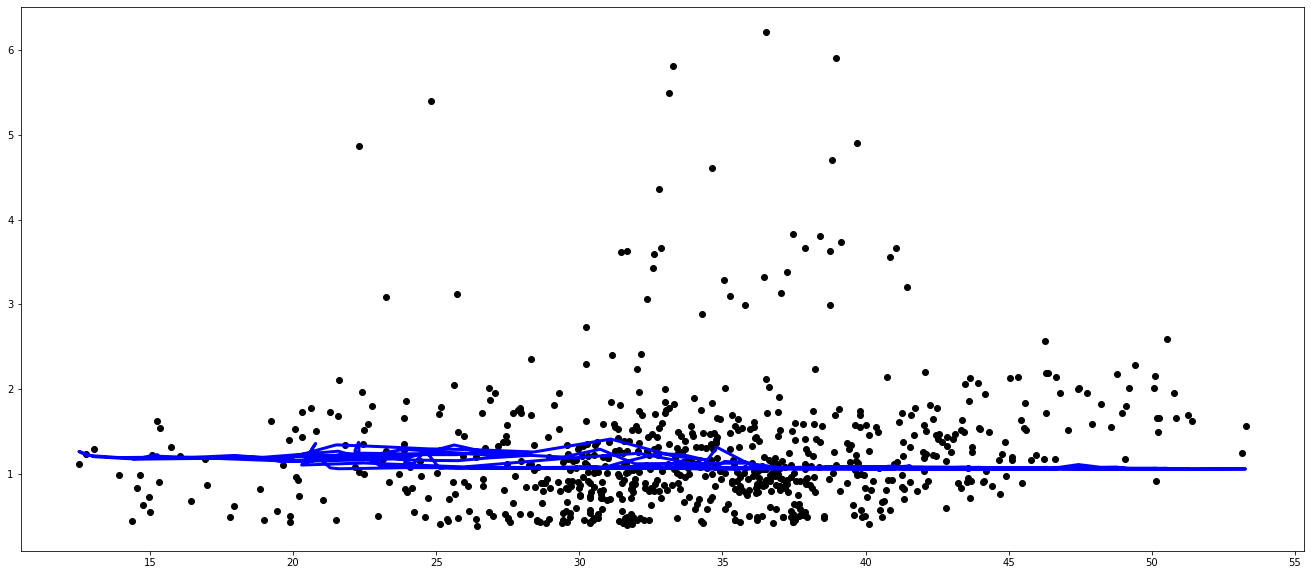

In [63]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[best_temperature_df.columns[0]], power_test,  color='black')
plt.plot(temp_test[best_temperature_df.columns[0]], kw_prediction, color='blue', linewidth=3)
plt.show()

print("Random Forest: Home B Hourly MAE: ",error)
hbhourlymae.append(error)
randomforest_type.append("Home B Hourly")
randomforest_mae.append(error)

In [64]:
best_temperature_df, depth = getBestRandomForestDF(homec_hourly_df, 8016, 'c')
power = homec_hourly_df[['use [kW]']]
power_train = power[0:8016]
power_test = power[8016:]
temp_train = best_temperature_df[0:8016]
temp_test = best_temperature_df[8016:]
regr = RandomForestRegressor(max_depth=depth)  
regr.fit(temp_train, power_train)
kw_prediction = regr.predict(temp_test)
error = mean_absolute_error(power_test, kw_prediction) 

<ipython-input-61-e619f294ea70>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:88: DataConversionWarning: A column-vector y was passed when

,Depth,Features,MAE error
0,1,"'temperature','apparentTemperature','dewPoint'",19.043575
1,1,"'temperature','apparentTemperature'",19.039493
2,1,'temperature',19.107266
3,1,'apparentTemperature',19.035094
4,1,'dewPoint',18.969754
...,...,...,...
65,10,'temperature',19.492769
66,10,'apparentTemperature',19.821548
67,10,'dewPoint',18.897755
68,10,"'apparentTemperature','dewPoint'",19.229287


Index(['dewPoint'], dtype='object')
Best Depth 5
Random Forest: Home C Hourly MAE:  18.85879761343595


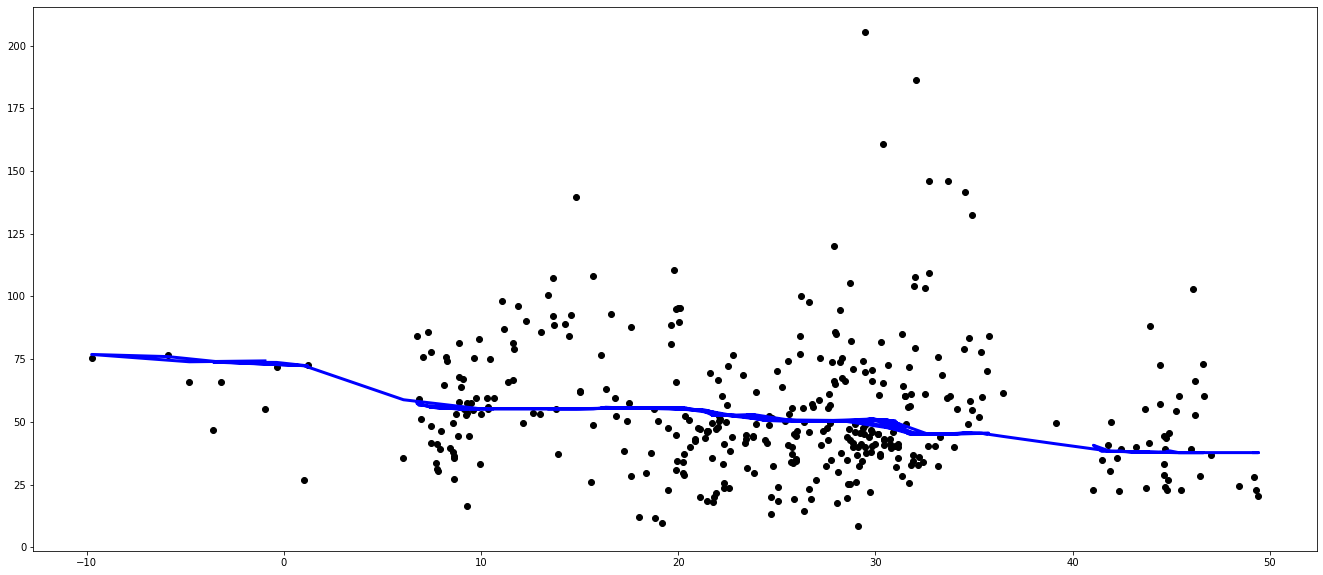

In [65]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[best_temperature_df.columns[0]], power_test,  color='black')
plt.plot(temp_test[best_temperature_df.columns[0]], kw_prediction, color='blue', linewidth=3)
plt.show()

print("Random Forest: Home C Hourly MAE: ",error)
hchourlymae.append(error)
randomforest_type.append("Home C Hourly")
randomforest_mae.append(error)

In [66]:
best_temperature_df, depth = getBestRandomForestDF(homef_hourly_df, 8016, 'f')
power = homef_hourly_df[['Usage [kW]']]
power_train = power[0:8016]
power_test = power[8016:]
temp_train = best_temperature_df[0:8016]
temp_test = best_temperature_df[8016:]
regr = RandomForestRegressor(max_depth=depth)  
regr.fit(temp_train, power_train)
kw_prediction = regr.predict(temp_test)
error = mean_absolute_error(power_test, kw_prediction) 

<ipython-input-61-e619f294ea70>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:88: DataConversionWarning: A column-vector y was passed when

,Depth,Features,MAE error
0,1,"'temperature','apparentTemperature','dewPoint'",52.676018
1,1,"'temperature','apparentTemperature'",52.626144
2,1,'temperature',52.726264
3,1,'apparentTemperature',52.723455
4,1,'dewPoint',51.889208
...,...,...,...
65,10,'temperature',49.265065
66,10,'apparentTemperature',48.855020
67,10,'dewPoint',49.876087
68,10,"'apparentTemperature','dewPoint'",44.684570


Index(['apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 9
Random Forest: Home F Hourly MAE:  44.66765033652767


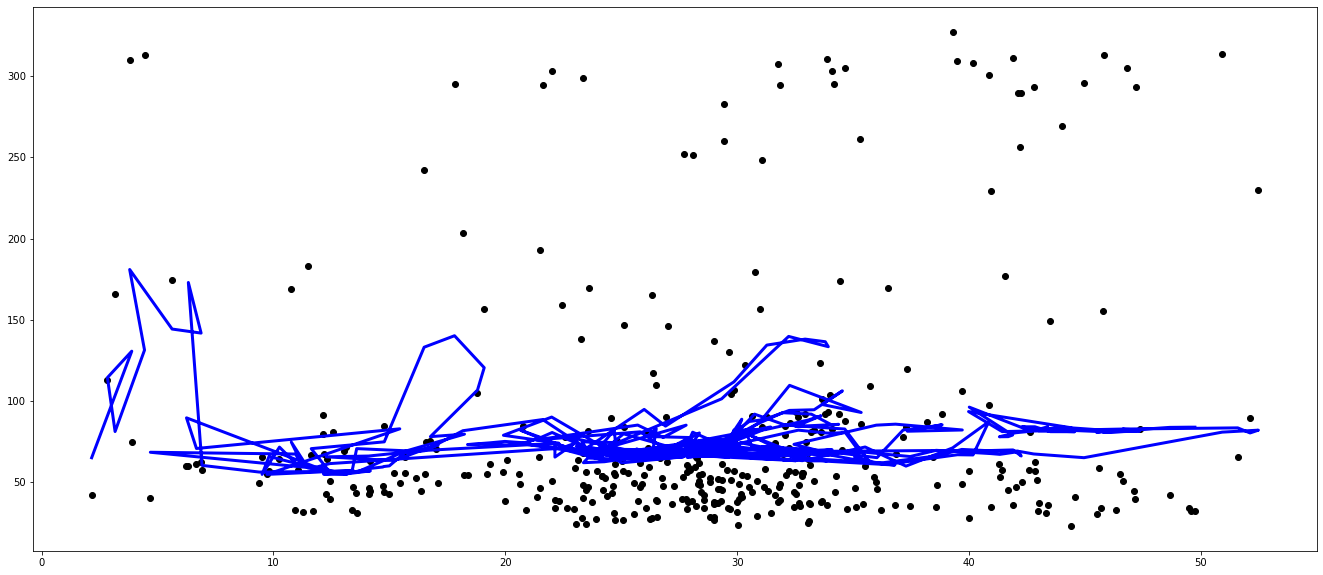

In [67]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[best_temperature_df.columns[0]], power_test,  color='black')
plt.plot(temp_test[best_temperature_df.columns[0]], kw_prediction, color='blue', linewidth=3)
plt.show()

print("Random Forest: Home F Hourly MAE: ",error)
hfhourlymae.append(error)
randomforest_type.append("Home F Hourly")
randomforest_mae.append(error)

# # # Daily

In [68]:
inputdf = homeb_daily_df.copy()
power = inputdf[['use [kW]']]
temperature,depth = getBestRandomForestDF(homeb_daily_df, 334, 'b')
power_train = power[0:334]
power_test = power[334:]
temp_train = temperature[0:334]
temp_test = temperature[334:]
regr = RandomForestRegressor(max_depth=depth)  
model = regr.fit(temp_train, power_train)
validationpred = regr.predict(temp_test)
validationerror= mean_absolute_error(power_test, validationpred)

<ipython-input-61-e619f294ea70>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:88: DataConversionWarning: A column-vector y was passed when

,Depth,Features,MAE error
0,1,"'temperature','apparentTemperature','dewPoint'",6.139184
1,1,"'temperature','apparentTemperature'",6.144126
2,1,'temperature',6.145787
3,1,'apparentTemperature',6.156615
4,1,'dewPoint',6.154227
...,...,...,...
65,10,'temperature',8.365428
66,10,'apparentTemperature',7.325323
67,10,'dewPoint',7.399343
68,10,"'apparentTemperature','dewPoint'",7.313502


Index(['apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 1
Random Forest: Home B Daily MAE:  6.145085130102784


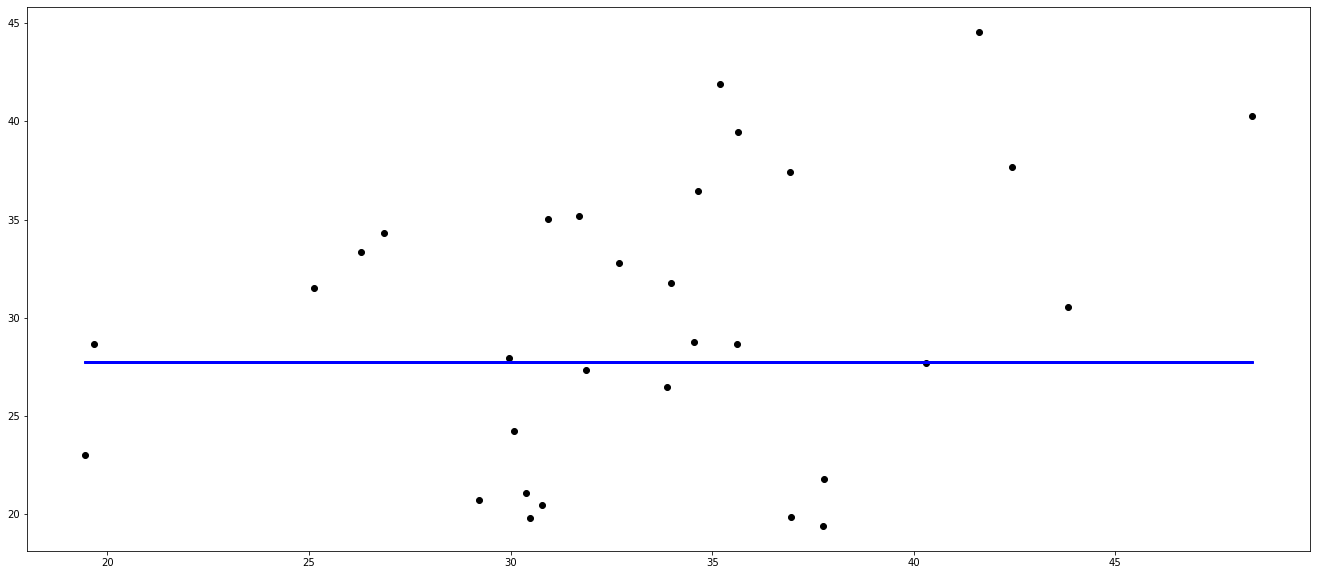

In [69]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[temperature.columns[0]], power_test,  color='black')
plt.plot(temp_test[temperature.columns[0]], validationpred, color='blue', linewidth=3)
plt.show()

hbdailymae.append(validationerror)
print("Random Forest: Home B Daily MAE: ",validationerror)
randomforest_type.append("Home B Daily")
randomforest_mae.append(validationerror)

In [70]:
inputdf = homec_daily_df.copy()
power = inputdf[['use [kW]']]
temperature,depth = getBestRandomForestDF(homec_daily_df, 334, 'c')
power_train = power[0:334]
power_test = power[334:]
temp_train = temperature[0:334]
temp_test = temperature[334:]
regr = RandomForestRegressor(max_depth=depth)  
model = regr.fit(temp_train, power_train)
validationpred = regr.predict(temp_test)
validationerror= mean_absolute_error(power_test, validationpred)

<ipython-input-61-e619f294ea70>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:88: DataConversionWarning: A column-vector y was passed when

,Depth,Features,MAE error
0,1,"'temperature','apparentTemperature','dewPoint'",240.246228
1,1,"'temperature','apparentTemperature'",240.371109
2,1,'temperature',240.055001
3,1,'apparentTemperature',238.891127
4,1,'dewPoint',230.961953
...,...,...,...
65,10,'temperature',199.336390
66,10,'apparentTemperature',215.296566
67,10,'dewPoint',210.438517
68,10,"'apparentTemperature','dewPoint'",218.390403


Index(['apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 4
Random Forest: Home C Daily MAE:  168.97482335182076


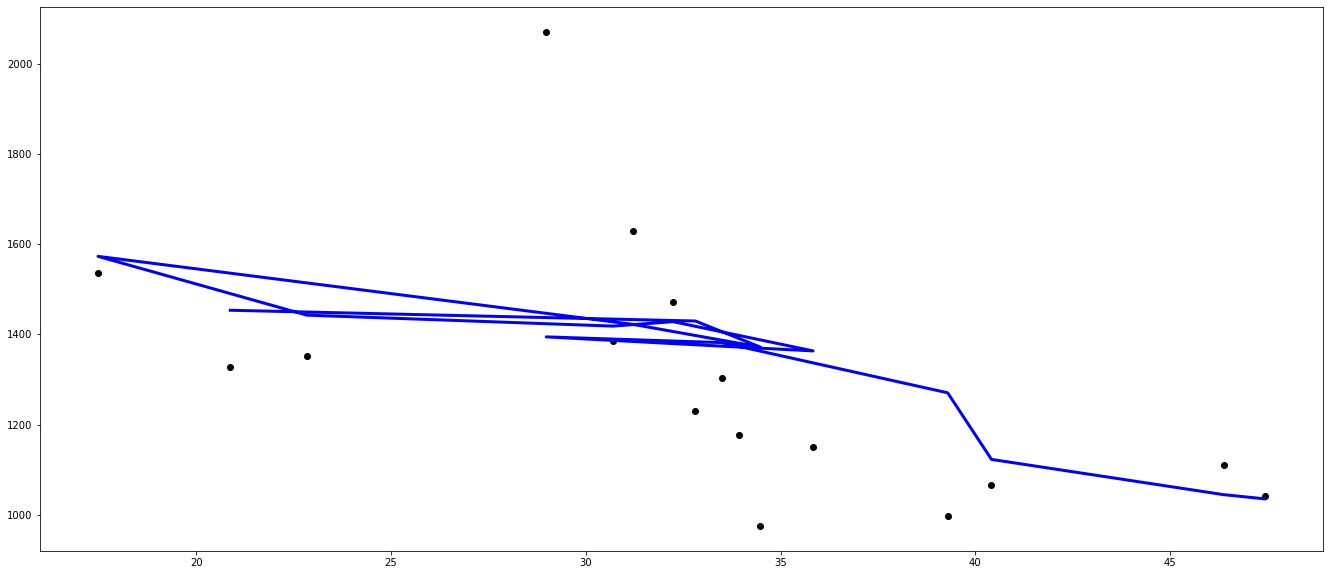

In [71]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[temperature.columns[0]], power_test,  color='black')
plt.plot(temp_test[temperature.columns[0]], validationpred, color='blue', linewidth=3)
plt.show()

hcdailymae.append(validationerror)
print("Random Forest: Home C Daily MAE: ",validationerror)
randomforest_type.append("Home C Daily")
randomforest_mae.append(validationerror)

In [72]:
inputdf = homef_daily_df.copy()
power = inputdf[['Usage [kW]']]

temperature,depth = getBestRandomForestDF(homef_daily_df, 334, 'f')
print(temperature.columns)
print("Best Depth", depth)
power_train = power[0:334]
power_test = power[334:]
temp_train = temperature[0:334]
temp_test = temperature[334:]
regr = RandomForestRegressor(max_depth=depth)  
model = regr.fit(temp_train, power_train)
validationpred = regr.predict(temp_test)
validationerror= mean_absolute_error(power_test, validationpred)

<ipython-input-61-e619f294ea70>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(temp_train, power_train)
<ipython-input-61-e619f294ea70>:88: DataConversionWarning: A column-vector y was passed when

,Depth,Features,MAE error
0,1,"'temperature','apparentTemperature','dewPoint'",361.677859
1,1,"'temperature','apparentTemperature'",360.945428
2,1,'temperature',361.064923
3,1,'apparentTemperature',361.752565
4,1,'dewPoint',361.005012
...,...,...,...
65,10,'temperature',432.769609
66,10,'apparentTemperature',385.176740
67,10,'dewPoint',389.668915
68,10,"'apparentTemperature','dewPoint'",382.596104


Index(['dewPoint'], dtype='object')
Best Depth 2


Index(['apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 2
Random Forest: Home F Daily MAE:  343.6003564356264


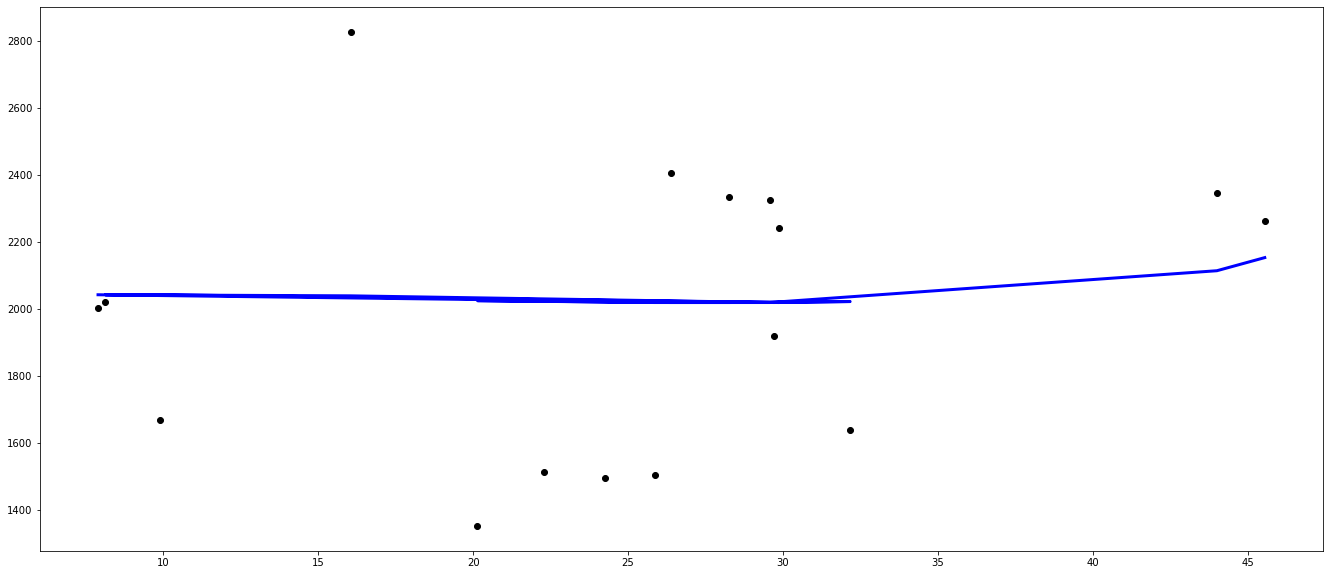

In [73]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[temperature.columns[0]], power_test,  color='black')
plt.plot(temp_test[temperature.columns[0]], validationpred, color='blue', linewidth=3)
plt.show()

hfdailymae.append(validationerror)
print("Random Forest: Home F Daily MAE: ",validationerror)
randomforest_type.append("Home F Daily")
randomforest_mae.append(validationerror)

In [74]:
print("Random Forest Method")

comparison = pd.DataFrame({
        'Type': randomforest_type,
        'MAE': randomforest_mae,
    })

display(comparison)

Random Forest Method


,Type,MAE
0,Home B Hourly,0.477712
1,Home C Hourly,18.858798
2,Home F Hourly,44.667650
3,Home B Daily,6.145085
4,Home C Daily,168.974823
5,Home F Daily,343.600356


# # ARIMA

We have tried the Autoregressive integrated moving average (ARIMA) model for time series forecasting. The data is divided into training, validation and test sets. We are using training and validation sets to fine tune our hyperparameters, like "p" and "d" in the order component. We choose the model with least mean absolute error on the validation set. This chosen optimal model is then used for prediction of test data.

In [75]:
models.append("ARIMA")
arima_type=[]
arima_mae=[]

def GetBestModel(train, test, home, split, hourly):
    ypredicted=[]
    optimalp =0
    optimald = 0
    leasterror = float("inf")
    for p in range(0,10):
        for d in range(0,2):
            newmodel = ARIMA(train, order=(p,d,0))
            model_fit = newmodel.fit(disp=0)
            
            if (home == 'b'):
                if (hourly):
                    ypredicted = model_fit.predict(start=split, end=(split+742))
                else:
                    ypredicted = model_fit.predict(start=split, end=(split+len(test)-1))
            if (home =='c'):
                if (hourly):
                    ypredicted = model_fit.predict(start=split, end=(split+381))
                else:
                    ypredicted = model_fit.predict(start=split, end=(split+14))
            if (home == 'f'):
                if (hourly):
                    ypredicted = model_fit.predict(start=split, end=(split+381))
                else:
                    ypredicted = model_fit.predict(start=split, end=(split+14))
                
            error = mean_absolute_error(test, ypredicted)
            if(error<leasterror):
                leasterror = error
                optimalp = p
                optimald = d
    
    return optimalp,optimald

# # # Hourly

In [76]:
meter_data = homeb_hourly_df[['use [kW]']].values
train = meter_data[:8016]
test = meter_data[8016:]
print(len(test))
optimalp,optimald = GetBestModel(train, test,'b',8016, True)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
    model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=8016, end=8758)
error = mean_absolute_error(test, ypredicted)
hbhourlymae.append(error)
print("ARIMA: Home B Hourly MAE : ", error)
arima_type.append("Home B Hourly")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

IndentationError: unexpected indent (<ipython-input-76-8267dbeda7e1>, line 8)

In [ ]:
meter_data = homec_hourly_df[['use [kW]']].values
train = meter_data[:8016]
test = meter_data[8016:]
optimalp,optimald = GetBestModel(train, test,'c', 8016, True)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=8016, end=8397)
error = mean_absolute_error(test, ypredicted)
hchourlymae.append(error)
print("ARIMA: Home C Hourly MAE : ", error)
arima_type.append("Home C Hourly")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

In [ ]:
meter_data = homef_hourly_df[['Usage [kW]']].values
train = meter_data[:8016]
test = meter_data[8016:]
optimalp,optimald = GetBestModel(train, test,'f',8016, True)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=8016, end=8397)
error = mean_absolute_error(test, ypredicted)
hfhourlymae.append(error)
print("ARIMA: Home F Hourly MAE : ", error)
arima_type.append("Home F Hourly")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

# # # Daily

In [ ]:
meter_data = homeb_daily_df[['use [kW]']].values
train = meter_data[:334]
test = meter_data[334:]
optimalp,optimald = GetBestModel(train, test, 'b', 335, False)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=335, end=364)
error = mean_absolute_error(test, ypredicted)
hbdailymae.append(error)
print("ARIMA: Home B Daily MAE :", error)
arima_type.append("Home B Daily")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

In [ ]:
meter_data = homec_daily_df[['use [kW]']].values
train = meter_data[:334]
test = meter_data[334:]
optimalp,optimald = GetBestModel(train, test, 'c', 335, False)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=335, end=349)
error = mean_absolute_error(test, ypredicted)
hcdailymae.append(error)
print("ARIMA: Home C Daily MAE :", error)
arima_type.append("Home C Daily")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

In [ ]:
meter_data = homef_daily_df[['Usage [kW]']].values
train = meter_data[:334]
test = meter_data[334:]
optimalp,optimald = GetBestModel(train, test, 'f', 335, False)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=335, end=349)
error = mean_absolute_error(test, ypredicted)
hfdailymae.append(error)
print("ARIMA: Home F Daily MAE :", error)
arima_type.append("Home F Daily")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

In [ ]:
comparison = pd.DataFrame({
    'Type': arima_type,
    'MAE': arima_mae,
})
print("ARIMA: MEAN ABSOLUTE ERROR:")
display(comparison)

# # Result

In [ ]:
models.append("Mean MAE")
hbhourlymae.append((hbhourlymae[0]+hbhourlymae[1]+hbhourlymae[2]+hbhourlymae[3])/4)
hchourlymae.append((hchourlymae[0]+hchourlymae[1]+hchourlymae[2]+hchourlymae[3])/4)
hfhourlymae.append((hfhourlymae[0]+hfhourlymae[1]+hfhourlymae[2]+hfhourlymae[3])/4)
hbdailymae.append((hbdailymae[0]+hbdailymae[1]+hbdailymae[2]+hbdailymae[3])/4)
hcdailymae.append((hcdailymae[0]+hcdailymae[1]+hcdailymae[2]+hcdailymae[3])/4)
hfdailymae.append((hfdailymae[0]+hfdailymae[1]+hfdailymae[2]+hfdailymae[3])/4)
finalcomparison = pd.DataFrame({
    'Model': models,
    'House B:Hourly': hbhourlymae,
    'House C:Hourly': hchourlymae,
    'House F:Hourly': hfhourlymae,
    'House B:Daily': hbdailymae,
    'House C:Daily': hcdailymae,
    'House F:Daily': hfdailymae,
})
print("MEAN ABSOLUTE ERROR:")
display(finalcomparison)